In [2]:
!pip install arch
!pip install pymannkendall

     |████████████████████████████████| 902 kB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 47.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!unrar x data.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from data.rar

Creating    data                                                      OK
Extracting  data/APTK.csv                                                  4%  OK 
Extracting  data/BELU.csv                                                  8%  OK 
Extracting  data/BRENT.csv                                                11%  OK 
Extracting  data/cbr_g_curve.csv                                          24%  OK 
Extracting  data/CHF.csv                                                  27%  OK 
Extracting  data/FESH.csv                                                 30%  OK 
Extracting  data/GOLD.csv                                                 33%  OK 
Extracting  data/IMOEX.csv                                                37%  OK 
Extracting  data/MVID.csv                                                 42%  OK 
Extr

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import scipy.stats as ss
import matplotlib.pyplot as plt

import pymannkendall as mk
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.gofplots as gofplots
import seaborn as sns
import statsmodels.graphics.tsaplots as spl

from statsmodels.tsa.seasonal import seasonal_decompose
# plt.style.use('ggplot')

In [5]:
raw_data = {}
df_all = pd.DataFrame()
for i in os.listdir("data"):
    # print(i)
    df = pd.read_csv(os.path.join("data",i))
    df.index = df["Date"]
    raw_data[i] = df
    if i == 'cbr_g_curve.csv':
        df.drop(columns = "Date", inplace = True)
        for col in df.columns:
            df_all[f"cbr_g_curve_{col}"] = df[col]
    else:
        df_all[df.columns[1]] = df[df.columns[1]]
df_all.drop(columns = ['OFZ_26207', 'OFZ_26209', 'OFZ_26211', 'OFZ_26212', 'OFZ_26218'],
                   inplace = True)
                   
df_all.index = df_all.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d') if isinstance(x, str) else x)
df_all.sort_index(inplace = True)
df_all = df_all.iloc[240:]
df_all = df_all.fillna(method = "ffill").fillna(method = "bfill")
df_change = df_all.pct_change().iloc[1:]
df_all

RASP       APTK       FESH      SNGSP  cbr_g_curve_0.25  \
Date                                                                        
2016-01-05   23.767300  13.982104   2.730000  23.326004            0.0863   
2016-01-06   23.969265  13.812212   2.750000  23.166597            0.0865   
2016-01-11   23.266426  13.506407   2.710000  23.060335            0.0967   
2016-01-12   22.571663  13.710277   2.720000  23.389763            0.0970   
2016-01-13   22.337383  14.228447   2.700000  23.326004            0.0967   
...                ...        ...        ...        ...               ...   
2021-12-24  426.772461  13.400000  26.680000  38.040001            0.0730   
2021-12-27  430.532562  13.340000  26.850000  38.384998            0.0739   
2021-12-28  432.036621  13.372000  26.860001  38.244999            0.0745   
2021-12-29  424.892395  13.490000  26.840000  38.325001            0.0752   
2021-12-30  441.154846  13.900000  27.190001  38.455002            0.0740   

            cbr_g_curve_0.5  cbr_g_curve_0.75  cbr_g_curve_1.0  \
Date                                                             
2016-01-05           0.0923            0.0960           0.0981   
2016-01-06           0.0924            0.0961           0.0984   
2016-01-11           0.1029            0.1055           0.1064   
2016-01-12           0.1033            0.1062           0.1074   
2016-01-13           0.1029            0.1054           0.1062   
...                     ...               ...              ...   
2021-12-24           0.0769            0.0795           0.0811   
2021-12-27           0.0775            0.0799           0.0815   
2021-12-28           0.0780            0.0802           0.0817   
2021-12-29           0.0787            0.0809           0.0823   
2021-12-30           0.0781            0.0804           0.0818   

            cbr_g_curve_2.0  cbr_g_curve_3.0  ...       NKNCP         BELU  \
Date                                          ...                            
2016-01-05           0.1000           0.0992  ...   10.536553   451.479553   
2016-01-06           0.1009           0.1002  ...   10.606642   443.170105   
2016-01-11           0.1052           0.1042  ...   10.513190   452.402832   
2016-01-12           0.1065           0.1054  ...   10.583279   444.093353   
2016-01-13           0.1056           0.1055  ...   10.840268   448.709717   
...                     ...              ...  ...         ...          ...   
2021-12-24           0.0836           0.0840  ...   98.000000  3414.000000   
2021-12-27           0.0841           0.0846  ...   99.160004  3367.000000   
2021-12-28           0.0839           0.0843  ...   98.860001  3334.000000   
2021-12-29           0.0844           0.0847  ...   98.820000  3345.000000   
2021-12-30           0.0835           0.0840  ...  101.680000  3350.000000   

                  IMOEX         PIKK       SELG      BRENT        MVID  \
Date                                                                     
2016-01-05  1754.130005   172.735977   4.114461  36.419998  205.346420   
2016-01-06  1748.569946   172.168823   4.163057  34.230000  206.397552   
2016-01-11  1682.540039   169.414124   4.049667  31.549999  191.756744   
2016-01-12  1690.300049   170.224335   4.025368  30.860001  187.927643   
2016-01-13  1684.780029   171.520676   4.033468  30.309999  190.480377   
...                 ...          ...        ...        ...         ...   
2021-12-24  3702.719971  1003.900024  59.549999  76.849998  450.700012   
2021-12-27  3740.629883  1021.000000  58.200001  78.599998  450.000000   
2021-12-28  3777.560059  1040.000000  58.209999  78.940002  435.500000   
2021-12-29  3741.070068  1075.000000  57.740002  79.230003  437.000000   
2021-12-30  3787.260010  1105.800049  57.820000  79.320000  437.700012   

               RTSI     GOLD      USD  
Date                                   
2016-01-05   752.70  2697.53  75.9507  
2016-01-06   736.82  2697.53  75.9507  
2016-01-11   699.13

In [6]:

def describe(data):

    """Проверка на тренд"""
    # print(data.describe())
    print(data.name)

    # mk_test = mk.original_test(data)
    # print("Mann_Kendall_Test:")
    # print(f"\ttrend = {mk_test[0]}, p-value = {mk_test[2]}")

    p_level = "10%"    
    adf_c = adfuller(data, regression = 'c')
    s_h0 = "{}: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value {:0.4f})"
    s_ha = "{}: H0 отвергается, ряд стационарен (p-value {:0.4f})"
    print("Расширенный тест Дики — Фуллера (ADF):")
    # if adf_c[0] > adf_c[4][p_level]:
    #     print(f"Can not reject hypothesis with constant only regression \n\tADF Statistic > CriticalValue ({adf_c[0]} > {adf_c[4][p_level]}) p-value {adf_c[1]}")
    # else:
    #     print(f"Reject hypothesis with constant only regression\n\tADF Statistic < CriticalValue ({adf_c[0]} < {adf_c[4][p_level]})  p-value {adf_c[1]}")   
    
    test_name = "Тест с константой"
    if adf_c[0] > adf_c[4][p_level]:
        print(s_h0.format(test_name, adf_c[1]))
    else:
        print(s_ha.format(test_name, adf_c[1]))   

    adf_ct = adfuller(data, regression = 'ct')
    test_name = "Тест с константой и линейным трендом"
    # if adf_ct[0] > adf_ct[4][p_level]:
    #     print(f"Can not reject hypothesis with constant and trend regression \n\tADF Statistic > CriticalValue ({adf_ct[0]} > {adf_ct[4][p_level]}) p-value {adf_ct[1]}")
    # else:
    #     print(f"Reject hypothesis with constant and trend regression \n\tADF Statistic < CriticalValue ({adf_ct[0]} < {adf_ct[4][p_level]})  p-value {adf_ct[1]}")   
    if adf_ct[0] > adf_ct[4][p_level]:
        print(s_h0.format(test_name, adf_ct[1]))
    else:
        print(s_ha.format(test_name, adf_ct[1]))   

    adf_ctt = adfuller(data, regression = 'ctt')
    test_name = "Тест с константой, линейным и квадратичным трендом"
    # if adf_ctt[0] > adf_ctt[4][p_level]:
    #     print(f"Can not reject hypothesis with constant, and linear and quadratic trend regression \n\tADF Statistic > CriticalValue ({adf_ctt[0]} > {adf_ctt[4][p_level]}) p-value {adf_ctt[1]}")
    # else:
    #     print(f"Reject hypothesis with constant, and linear and quadratic trend regression\n\tADF Statistic < CriticalValue ({adf_ctt[0]} < {adf_ctt[4][p_level]})  p-value {adf_ctt[1]}")   
    if adf_ctt[0] > adf_ctt[4][p_level]:
        print(s_h0.format(test_name, adf_ctt[1]))
    else:
        print(s_ha.format(test_name, adf_ctt[1]))   
    
    adf_nc = adfuller(data, regression = 'n')
    test_name = "Тест без константы и тренда"
    # if adf_nc[0] > adf_nc[4][p_level]:
    #     print(f"Can not reject hypothesis with no constant, no trend regression \n\tADF Statistic > CriticalValue ({adf_nc[0]} > {adf_nc[4][p_level]}) p-value {adf_nc[1]}")
    # else:
    #     print(f"Reject hypothesis with no constant, no trend regression\n\tADF Statistic < CriticalValue ({adf_nc[0]} < {adf_nc[4][p_level]})  p-value {adf_nc[1]}")   
    if adf_nc[0] > adf_nc[4][p_level]:
        print(s_h0.format(test_name, adf_nc[1]))
    else:
        print(s_ha.format(test_name, adf_nc[1]))   

    # return adf_nc

In [7]:
def draw_graphs(data, title = ""):
    # with plt.style.context("ggplot"): 
        inc = data.pct_change()[1:]
        
        fig, axs = plt.subplots(2,1,figsize = (12,4))
        plt.subplots_adjust(hspace=0.4)
        axs[0].plot(data)
        axs[0].title.set_text(f'History data for {title}')
        axs[0].grid()
        axs[1].plot(inc)
        axs[1].title.set_text(f'Percentage changes for {title}')
        axs[1].grid()
        # plt.show()

        fig, axs = plt.subplots(3,2,figsize = (12,10))
        plt.subplots_adjust(hspace=0.4)

        axs[0,0].grid()
        axs[0,1].grid()
        axs[1,0].grid()
        axs[1,1].grid()
        axs[2,0].grid()
        axs[2,1].grid()

        spl.plot_acf(data, lags = 30, ax = axs[0,0])
        spl.plot_pacf(data, lags = 30, ax = axs[0,1])

        axs[1,0].hist(data, bins = 60)
        axs[1,0].title.set_text('Histogram (history)')
        axs[1,1].hist(inc, bins = 60)
        axs[1,1].title.set_text('Histogram (changes)')
        

        # fig, ((ax_qq, ax_pp),_) = plt.subplots(2,2,figsize = (12,6))
        # plt.subplots_adjust(hspace=0.4)
        (ax_qq, ax_pp) = (axs[2,0], axs[2,1])
        distribution = gofplots.ProbPlot(inc, fit=True)

        distribution.qqplot(line ='r', ax = ax_qq)
        ax_qq.title.set_text('Q-Q')
        distribution.ppplot(line='45', ax = ax_pp)
        ax_pp.title.set_text('P-P')
        # distribution.probplot(line='r', ax = axs[1,0])
        # axs[1,0].title.set_text('Prob')
        # plt.show()


In [8]:
def plot_decomposition(data, name, period = 1):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 7), sharex = True)
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(f'Разложение {name} на тренд/сезонность/ошибку (период {period})')
    # result = seasonal_decompose(data[name], model='multiplicative', period = period)
    result = seasonal_decompose(data[name], model='additive', period = period)
    result.trend.plot(ax=ax1)
    result.seasonal.plot(ax=ax2)
    result.resid.plot(ax=ax3)
    plt.setp(ax1, ylabel='Тренд', xlabel='Время', title='')
    plt.setp(ax2, ylabel='Сезонность', xlabel='Время', title='')
    plt.setp(ax3, ylabel='Ошибка', xlabel='Время', title='')
    ax1.grid()
    ax2.grid()
    ax3.grid()
    plt.show()

In [9]:
def get_description(ticker):
    draw_graphs(df_all[ticker], title = ticker)
    describe(df_all[ticker])
    plot_decomposition(df_all[[ticker]], ticker, 365 // 4)
    plot_decomposition(df_all[[ticker]], ticker, 365)

In [10]:
df_all.columns

Index(['RASP', 'APTK', 'FESH', 'SNGSP', 'cbr_g_curve_0.25', 'cbr_g_curve_0.5',
       'cbr_g_curve_0.75', 'cbr_g_curve_1.0', 'cbr_g_curve_2.0',
       'cbr_g_curve_3.0', 'cbr_g_curve_5.0', 'cbr_g_curve_7.0',
       'cbr_g_curve_10.0', 'cbr_g_curve_15.0', 'cbr_g_curve_20.0',
       'cbr_g_curve_30.0', 'PHOR', 'YNDX', 'CHF', 'NKNCP', 'BELU', 'IMOEX',
       'PIKK', 'SELG', 'BRENT', 'MVID', 'RTSI', 'GOLD', 'USD'],
      dtype='object')

# Description all data

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


RASP
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9989)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)


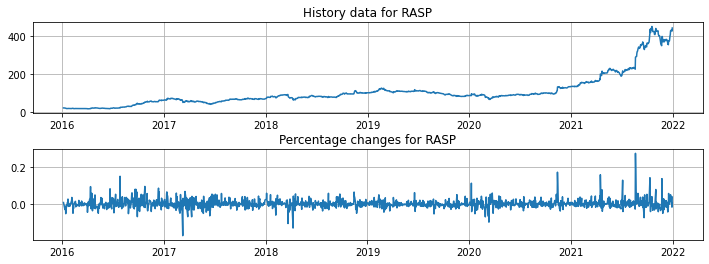

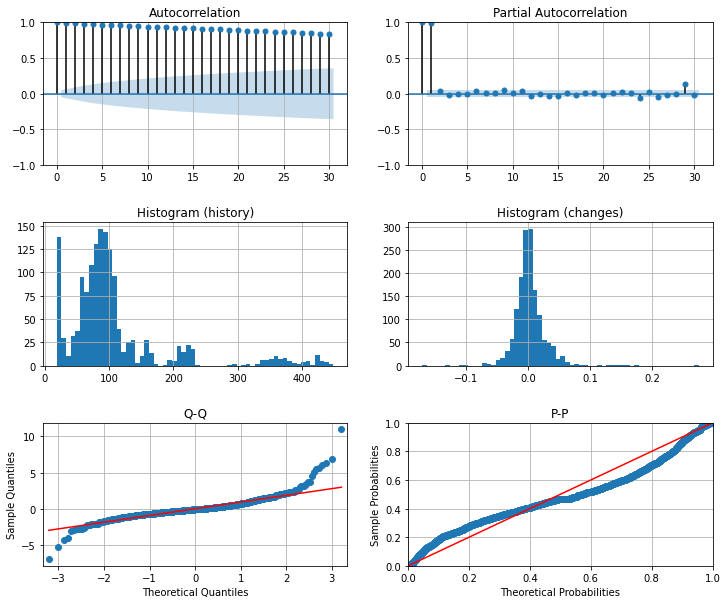

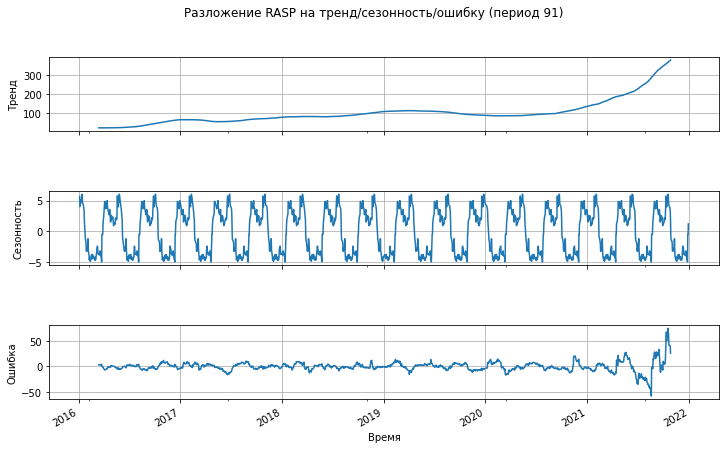

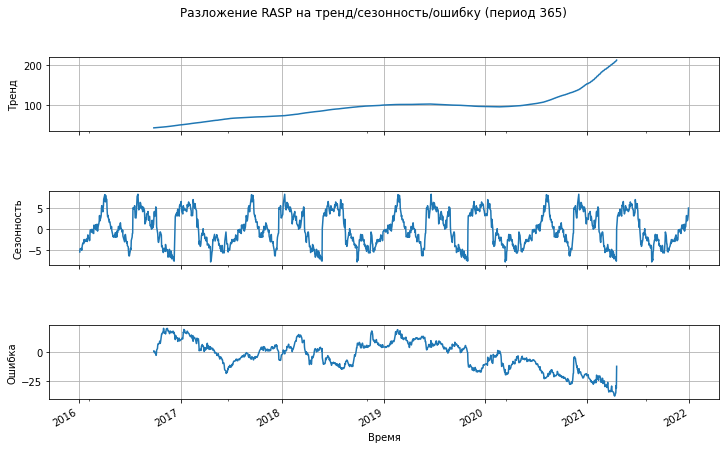

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


APTK
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.6661)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5662)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9112)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5598)


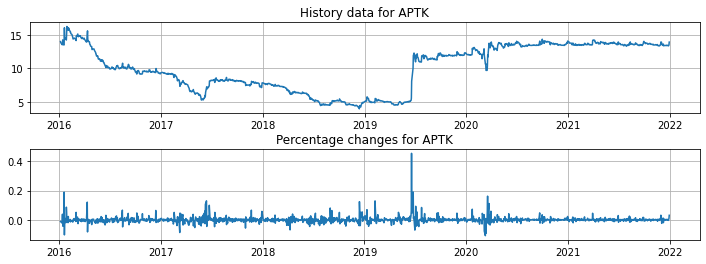

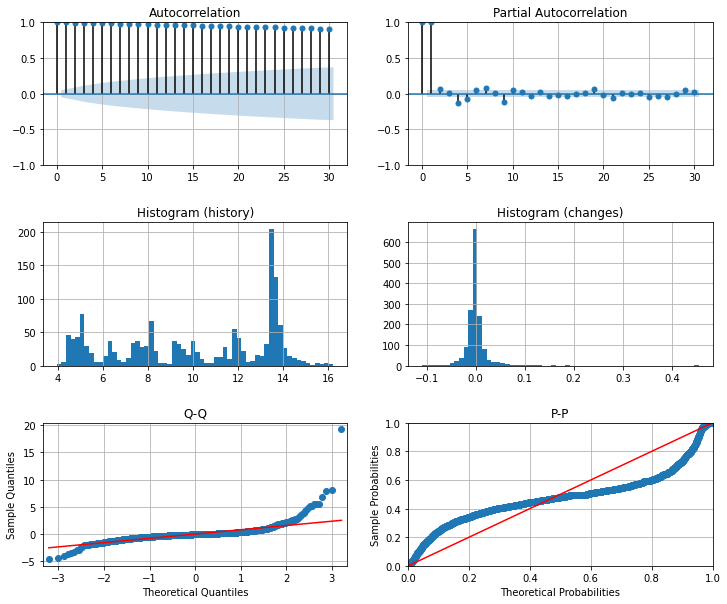

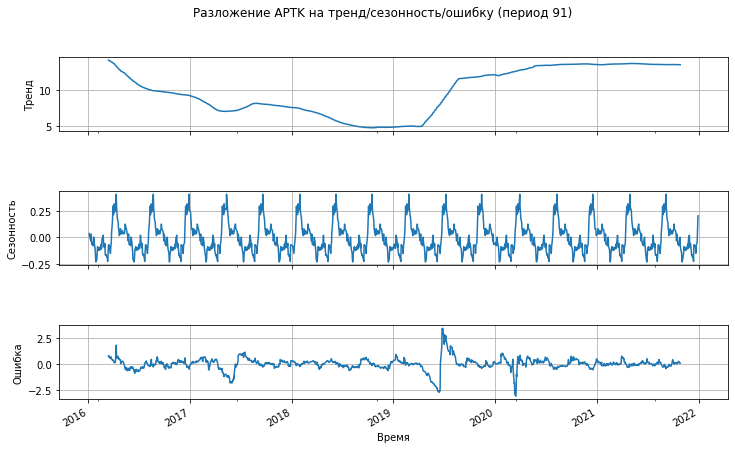

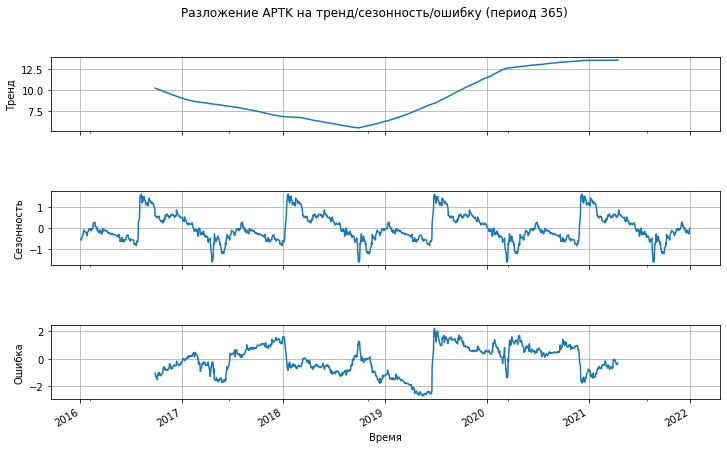

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


FESH
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9984)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9953)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9603)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9994)


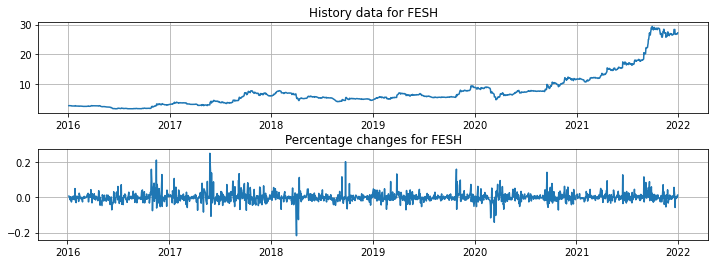

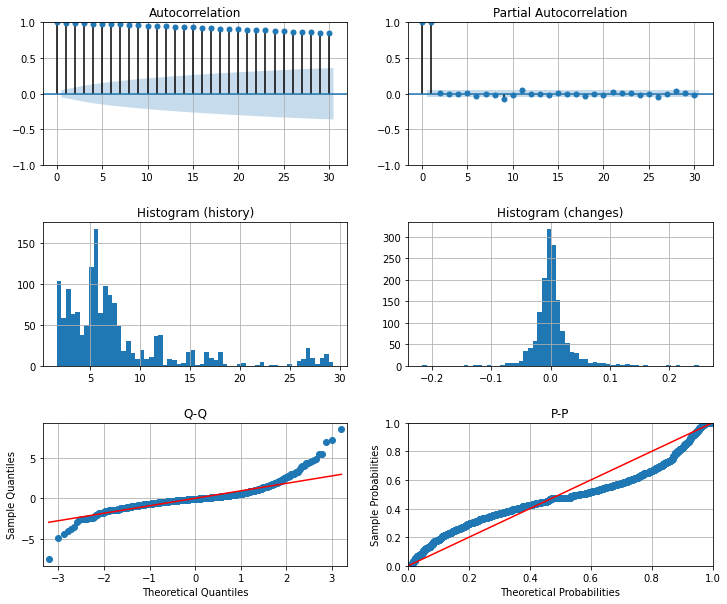

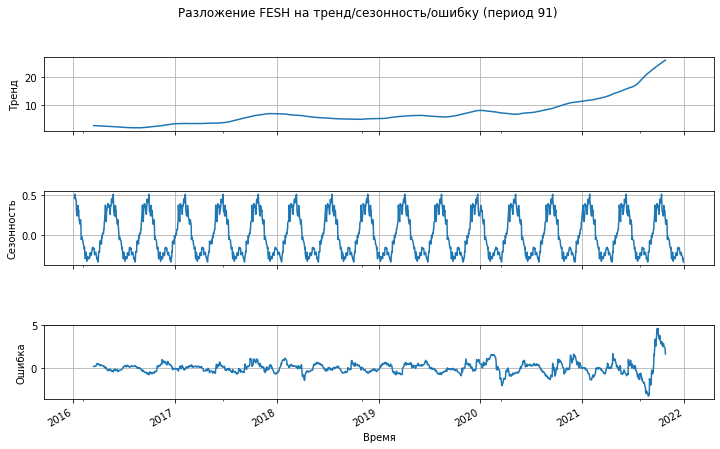

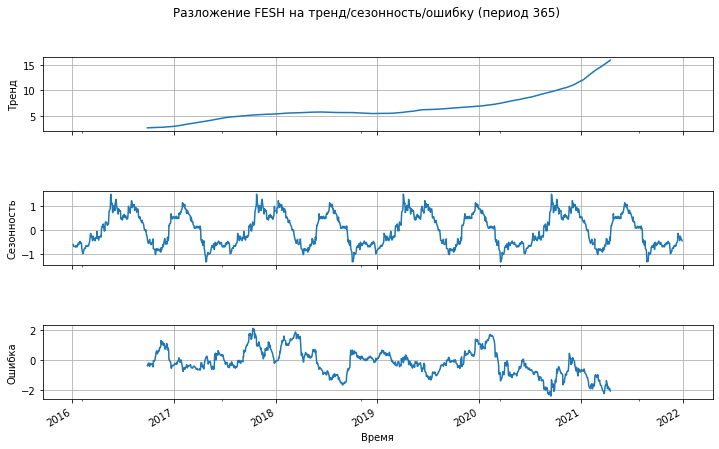

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


SNGSP
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9272)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1386)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1676)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9247)


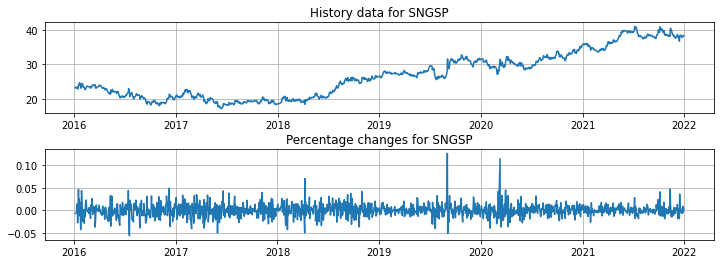

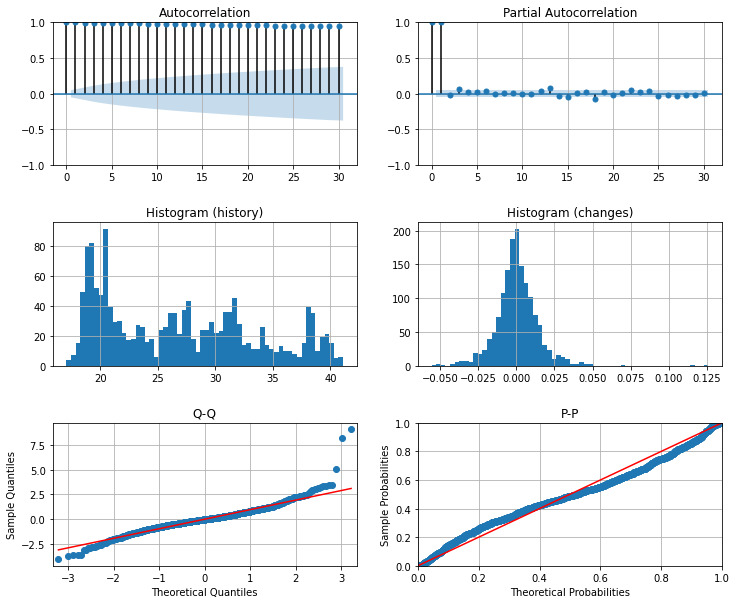

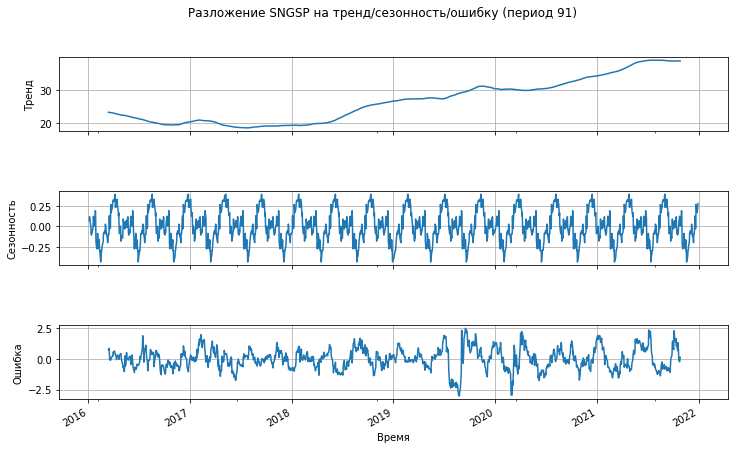

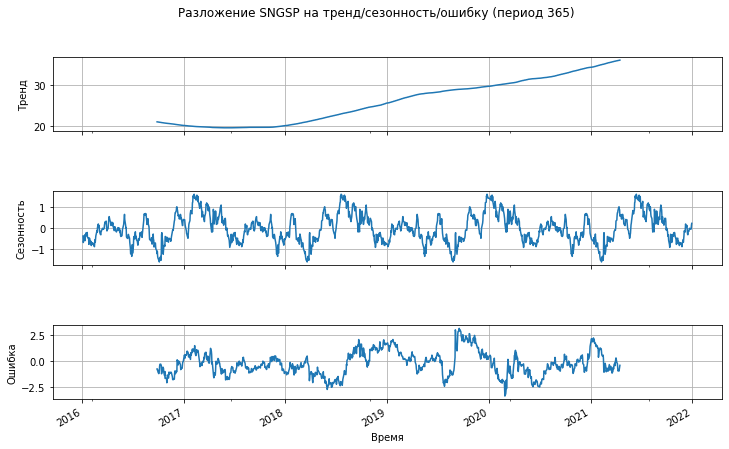

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_0.25
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.6626)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9730)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7689)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4399)


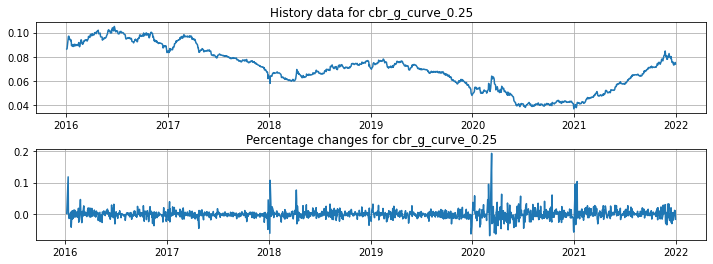

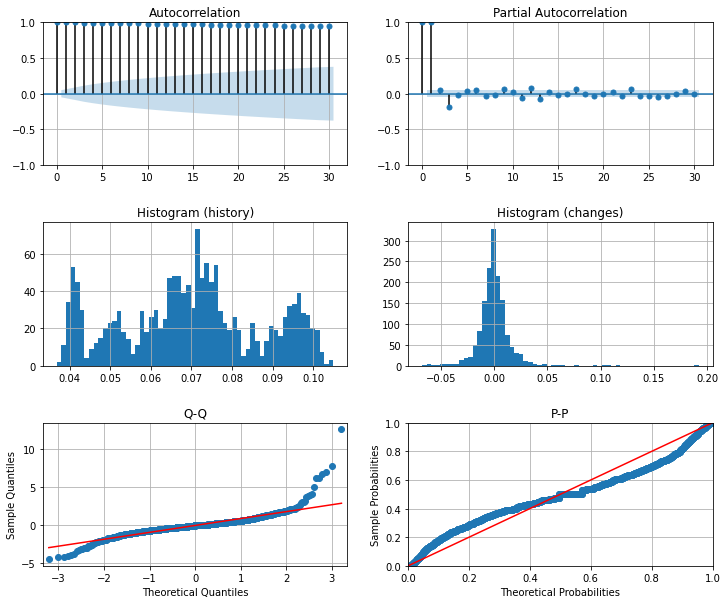

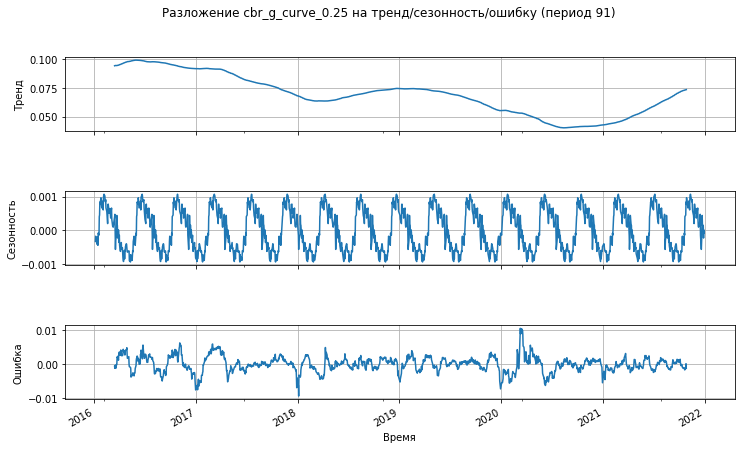

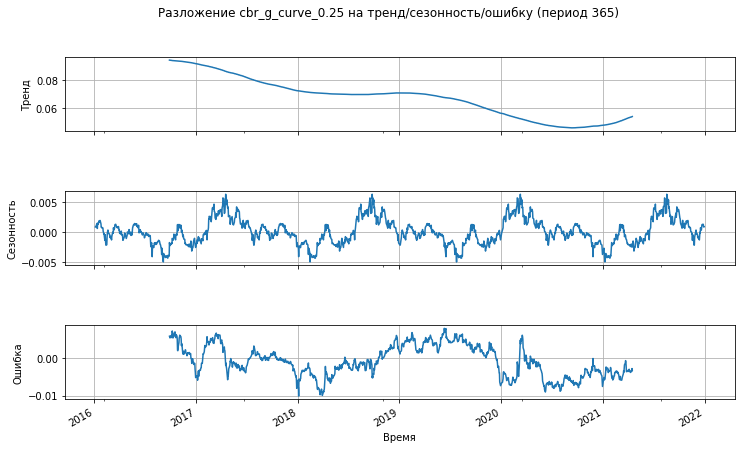

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_0.5
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3351)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9906)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9774)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2076)


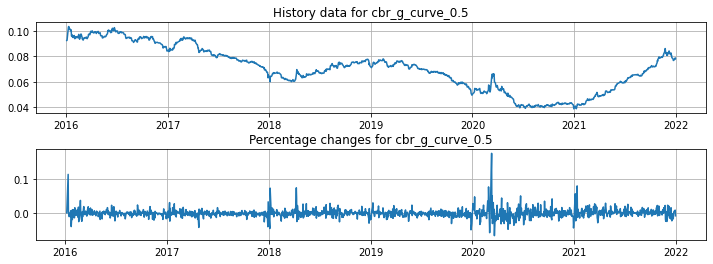

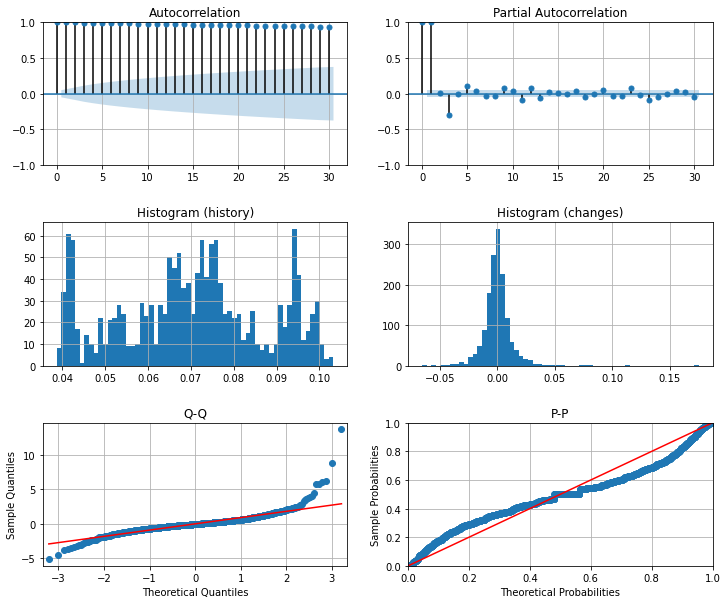

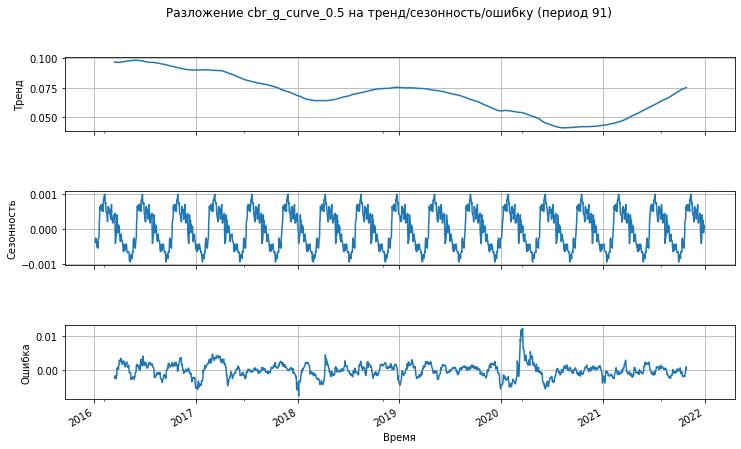

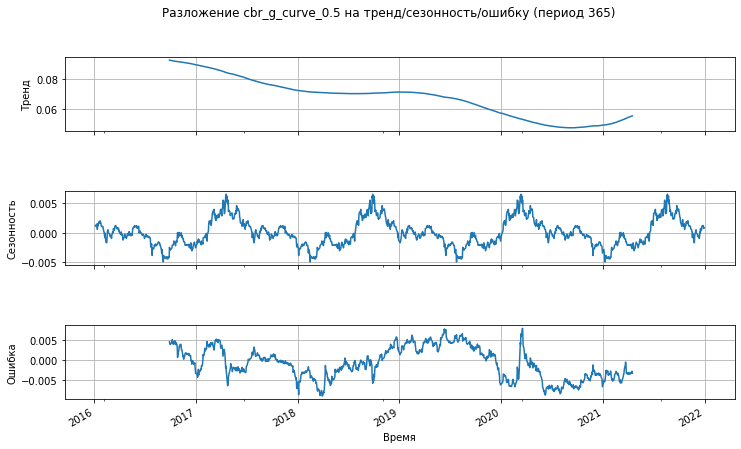

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_0.75
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2355)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9917)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9860)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1748)


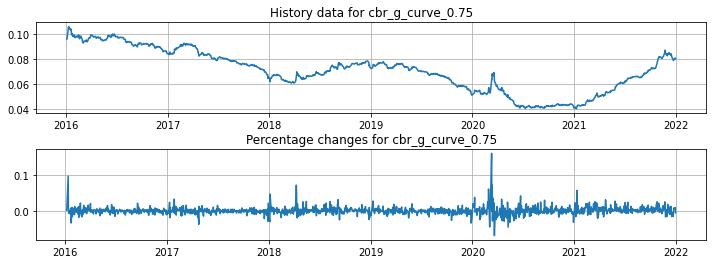

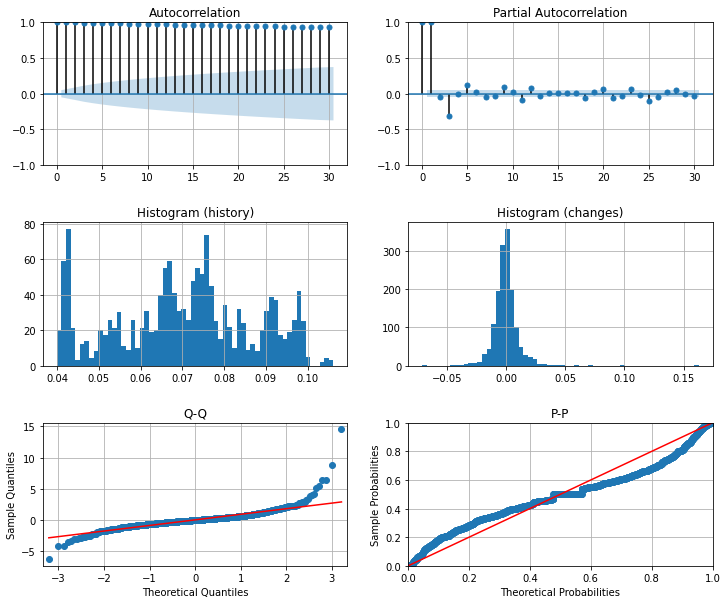

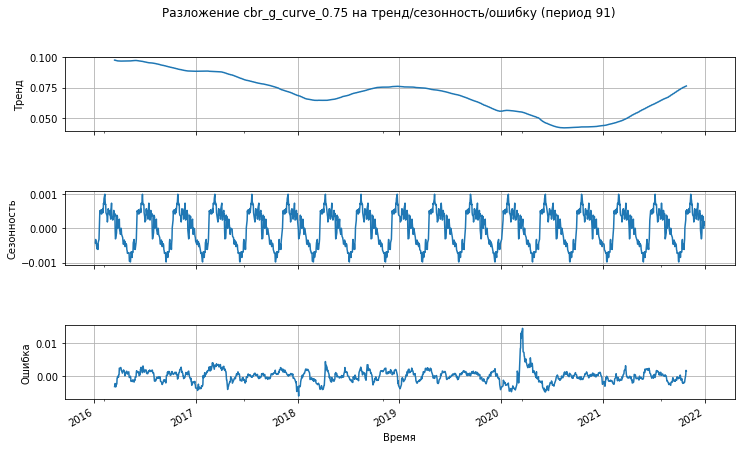

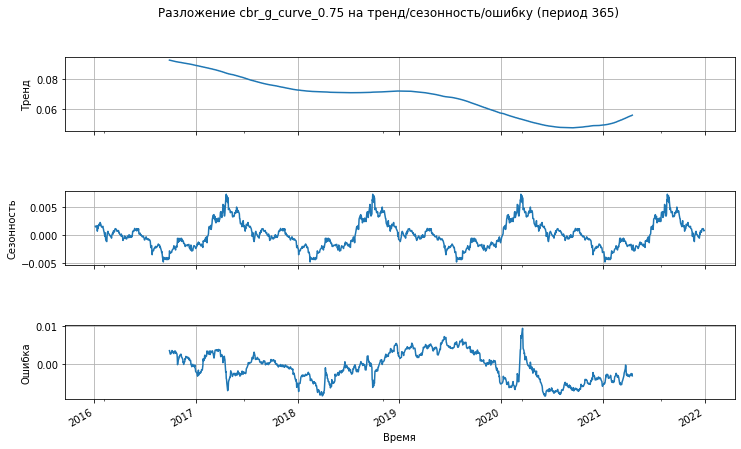

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_1.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3148)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9953)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9931)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2300)


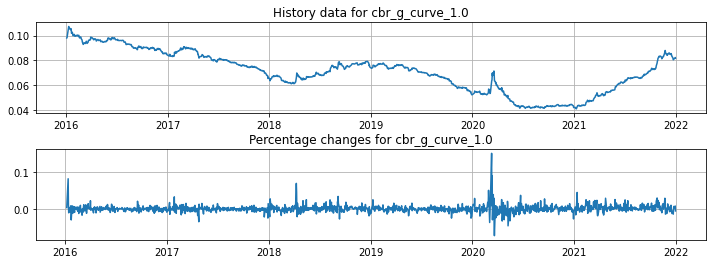

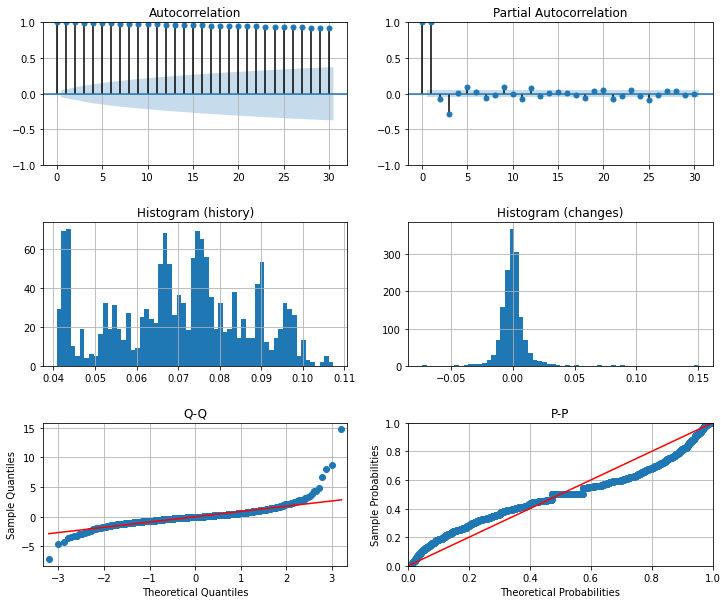

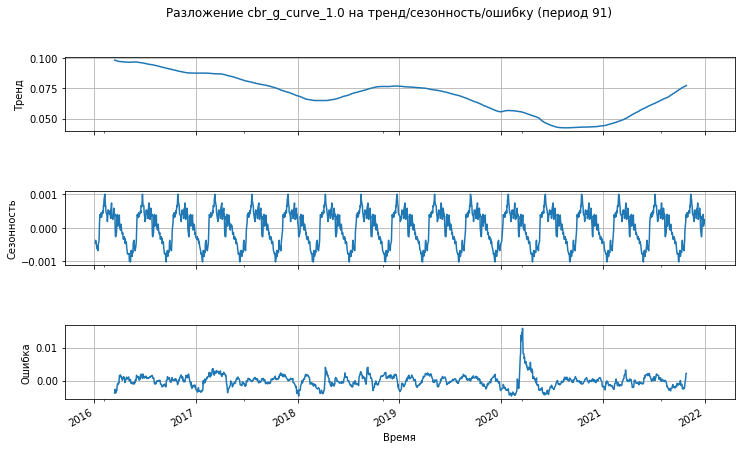

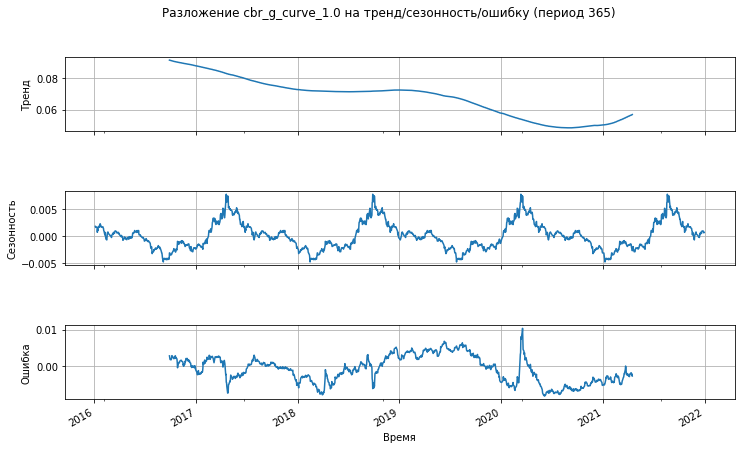

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_2.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2276)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9880)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9866)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2417)


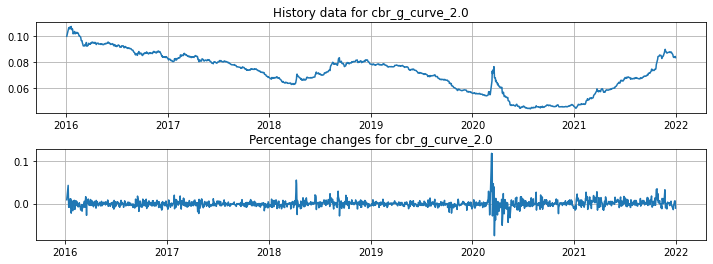

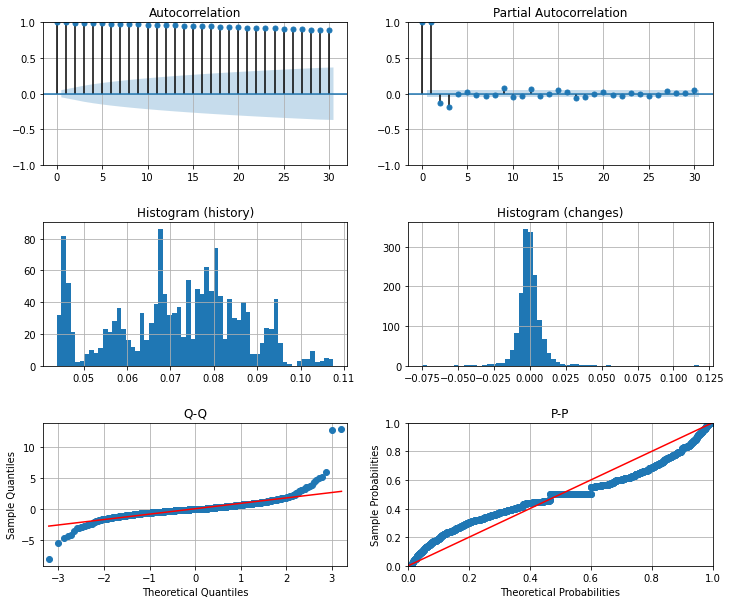

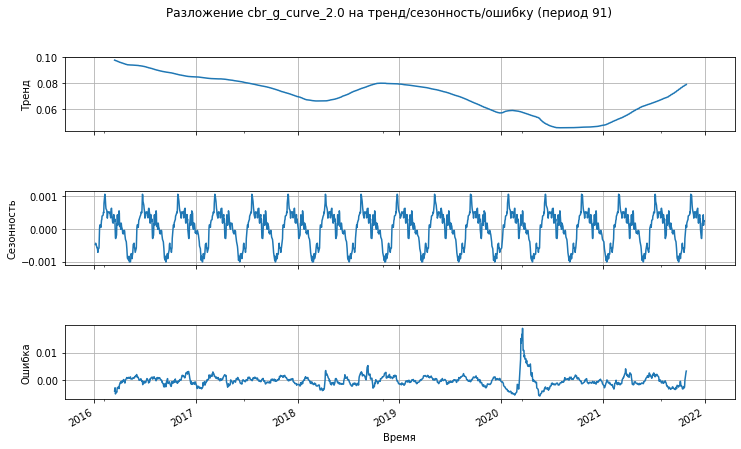

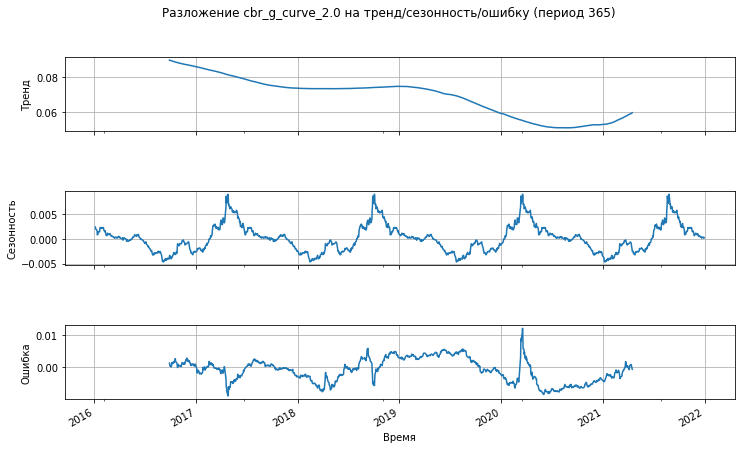

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_3.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1775)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9626)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9656)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2612)


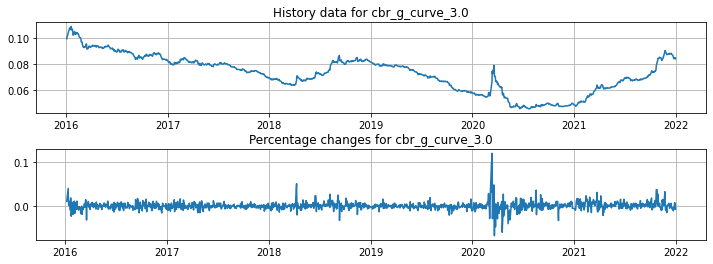

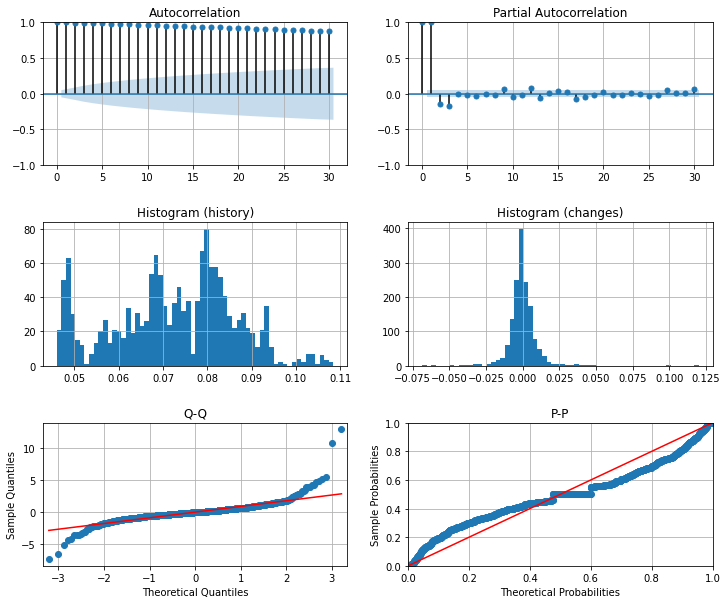

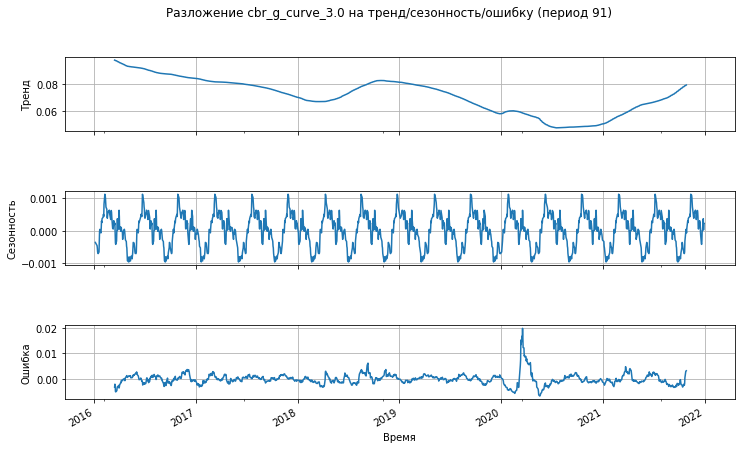

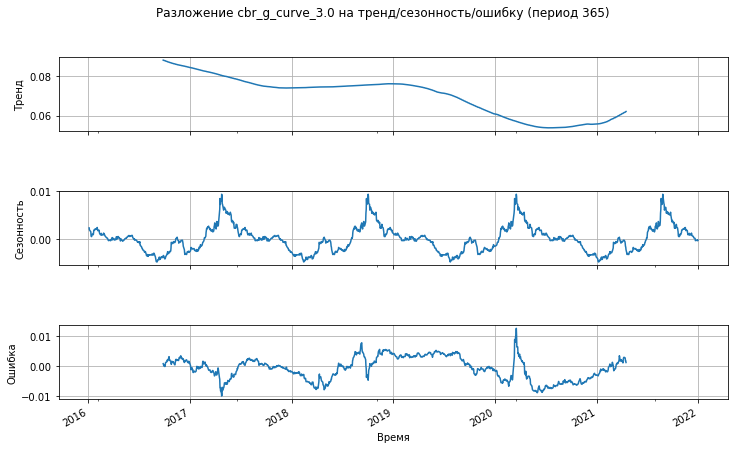

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_5.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1140)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8531)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8930)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2890)


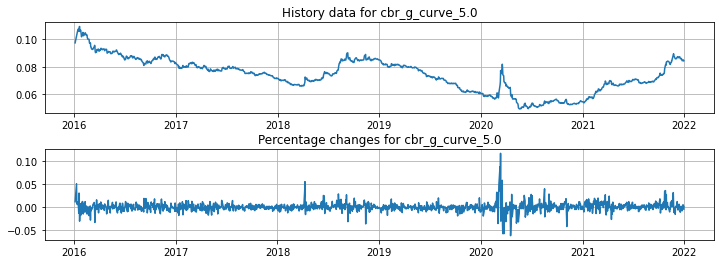

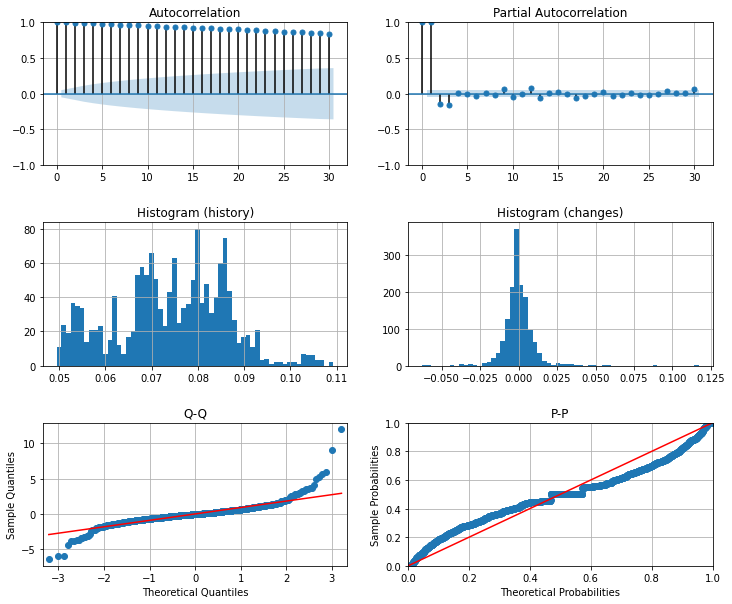

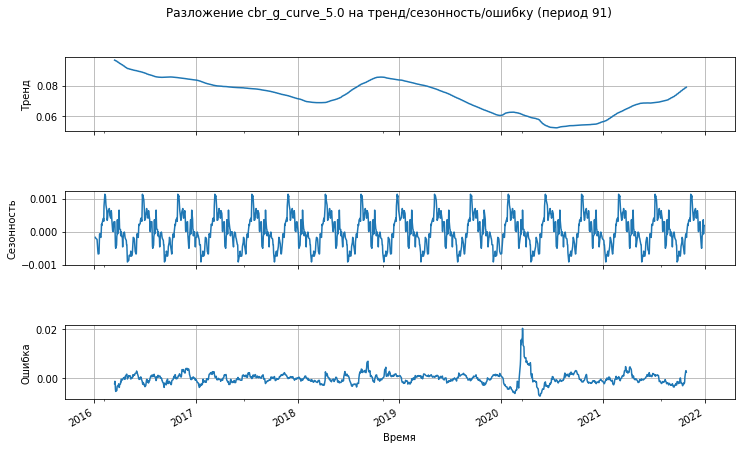

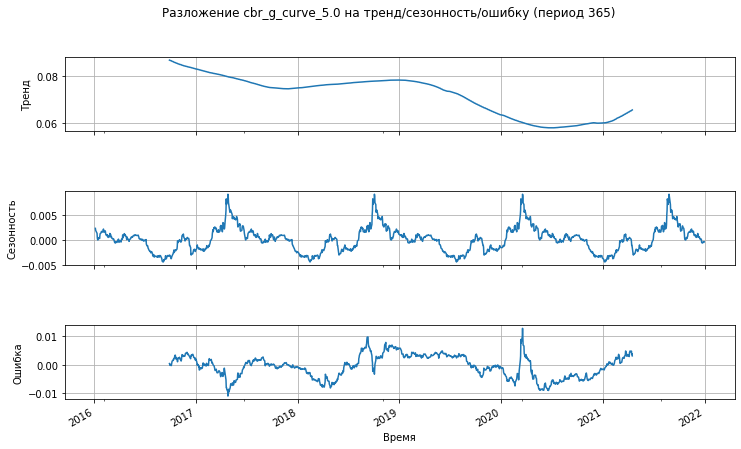

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_7.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: H0 отвергается, ряд стационарен (p-value 0.0785)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7258)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8186)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2980)


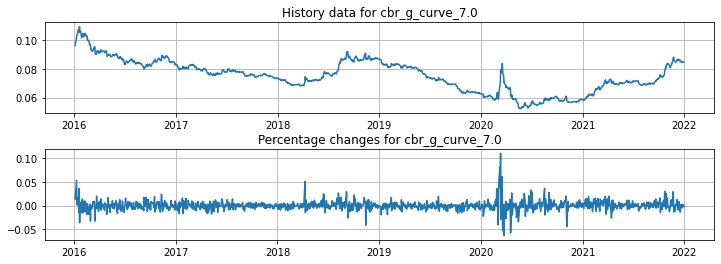

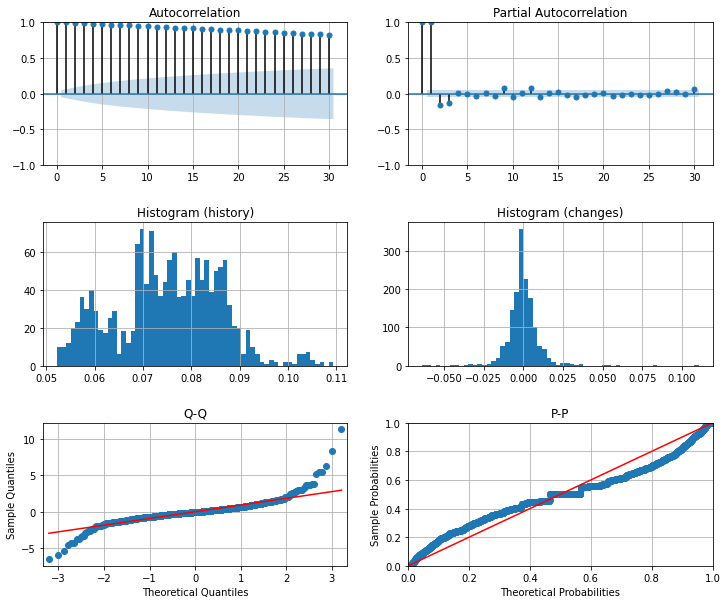

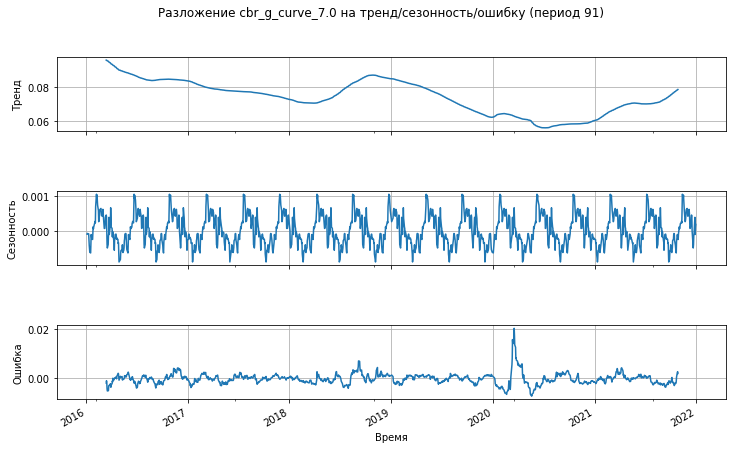

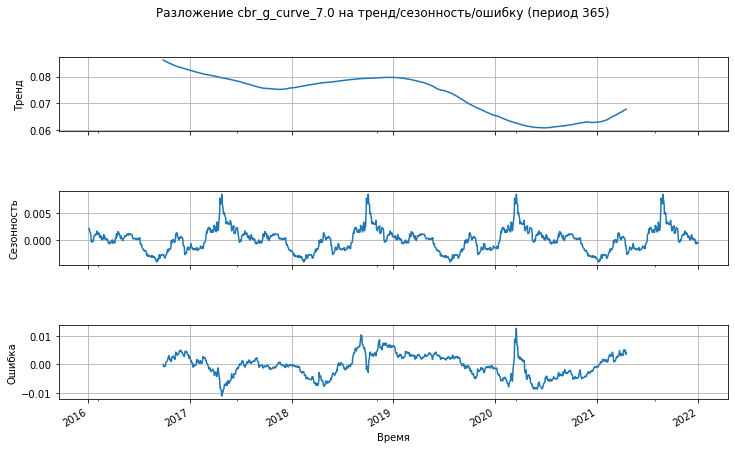

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_10.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: H0 отвергается, ряд стационарен (p-value 0.0166)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4905)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7041)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2007)


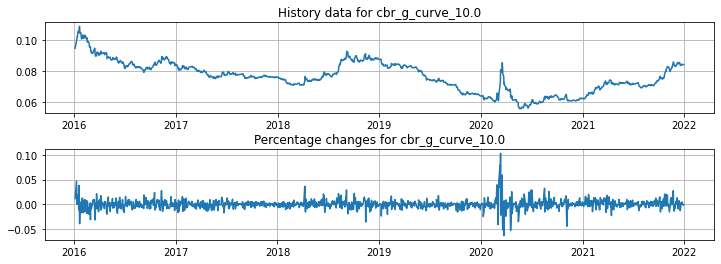

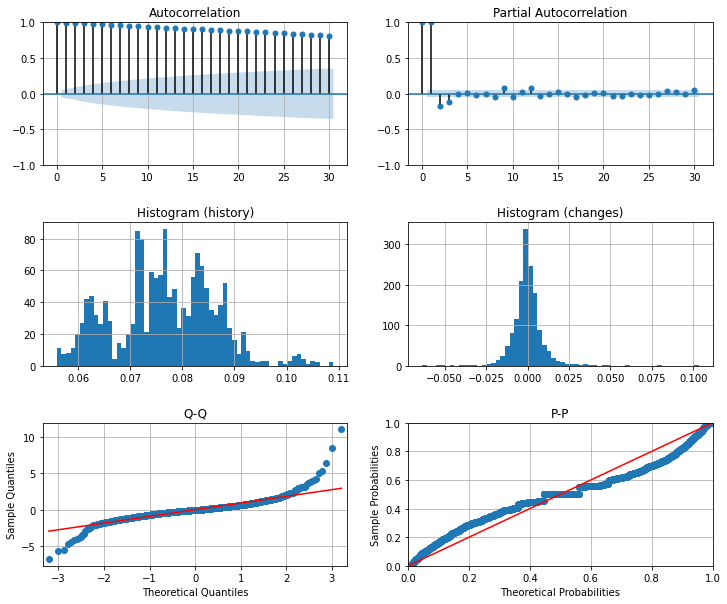

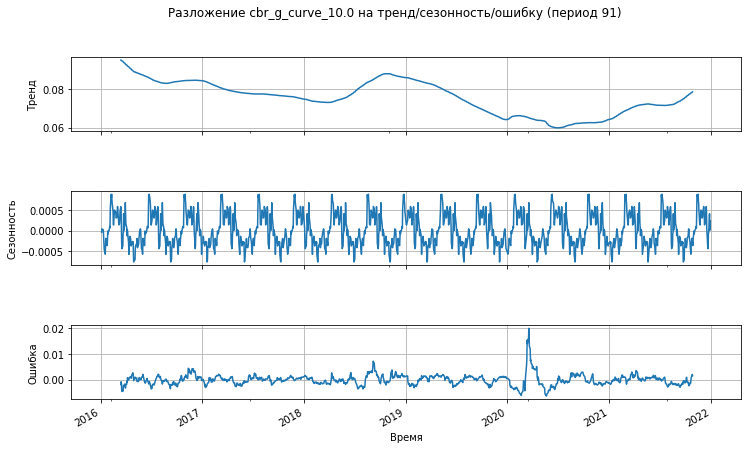

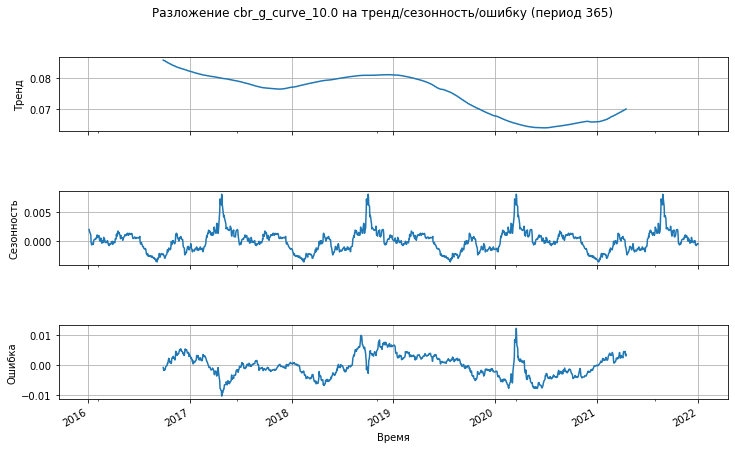

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_15.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: H0 отвергается, ряд стационарен (p-value 0.0548)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3968)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5567)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1992)


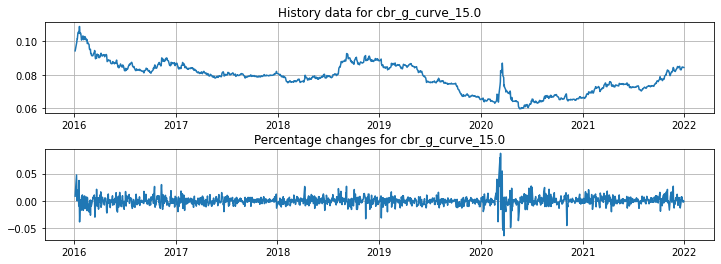

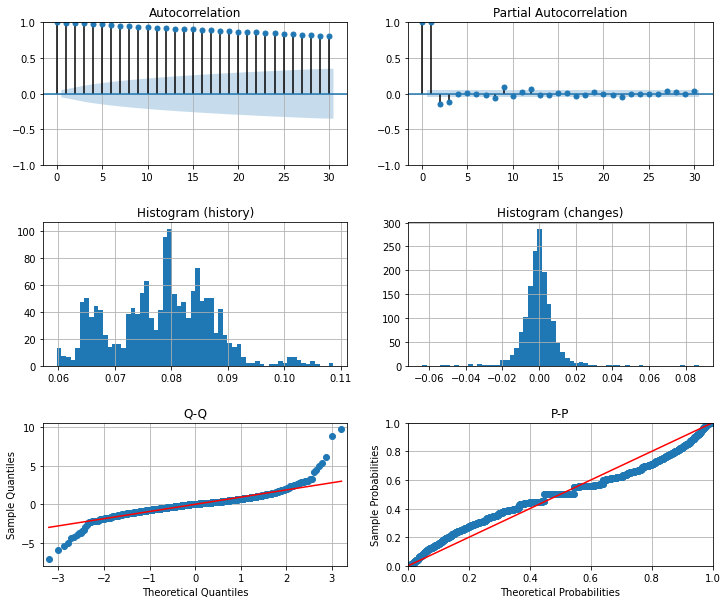

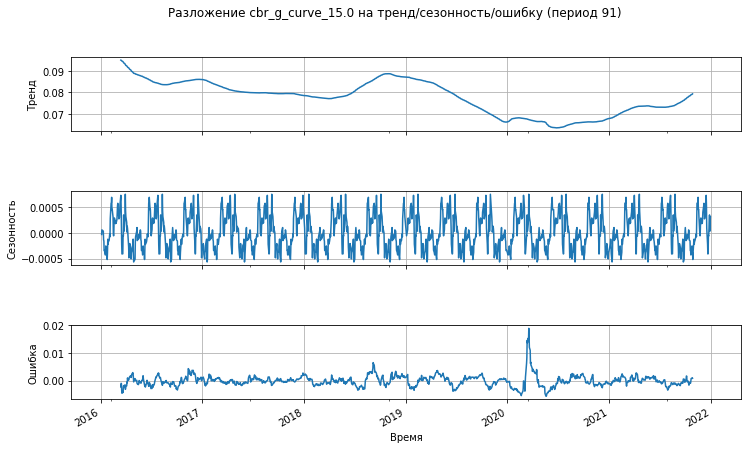

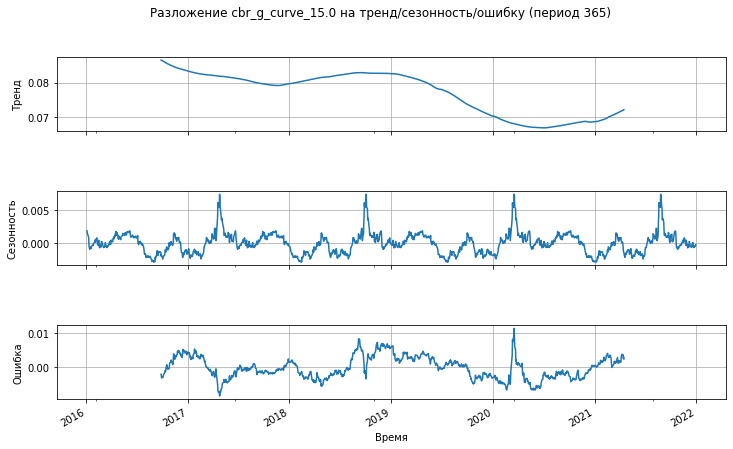

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_20.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: H0 отвергается, ряд стационарен (p-value 0.0537)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2906)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4511)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3620)


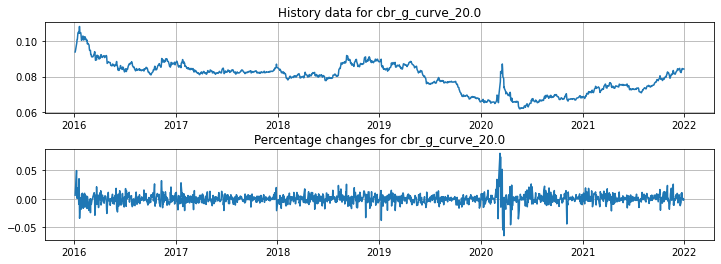

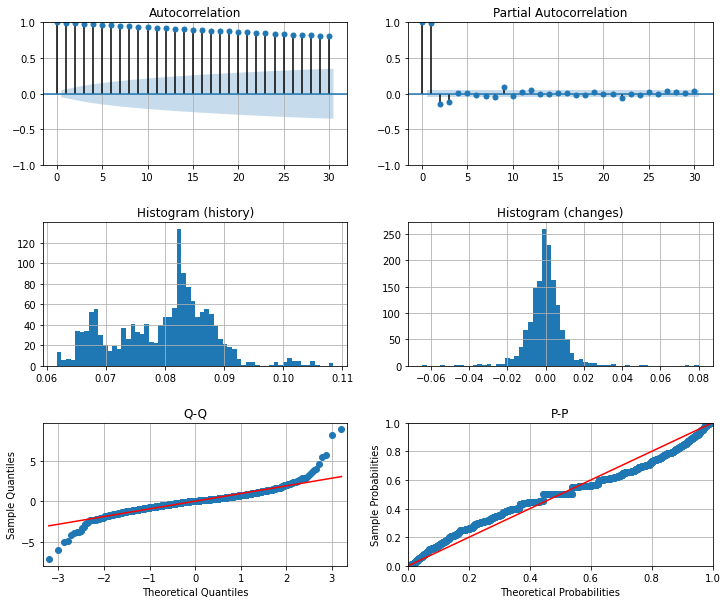

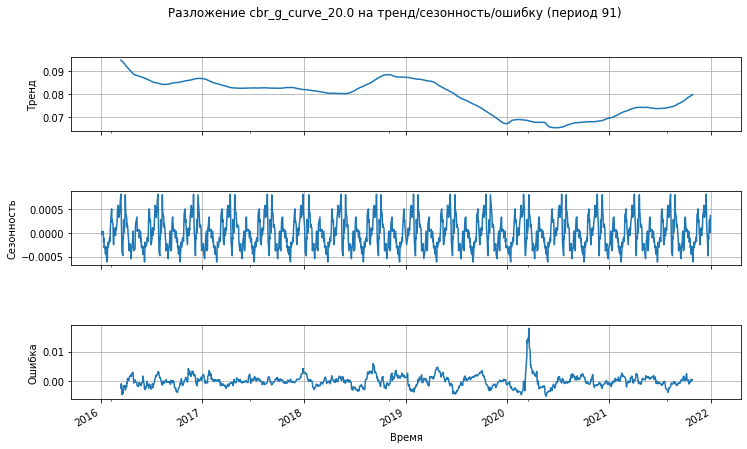

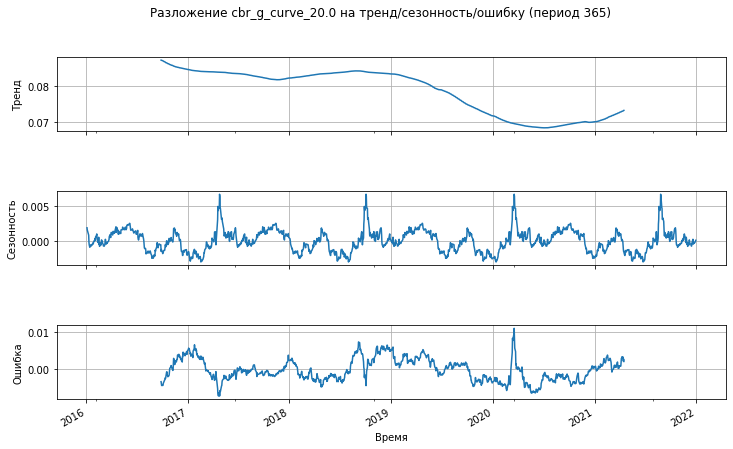

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


cbr_g_curve_30.0
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: H0 отвергается, ряд стационарен (p-value 0.0788)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1875)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3438)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4057)


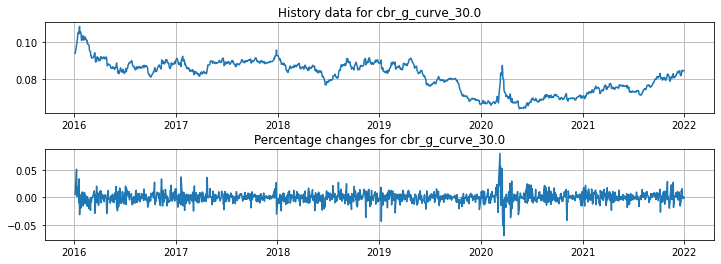

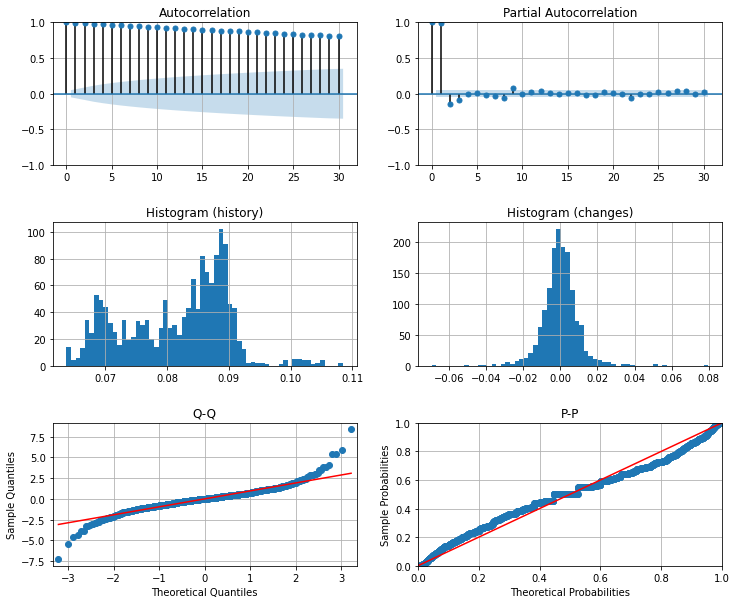

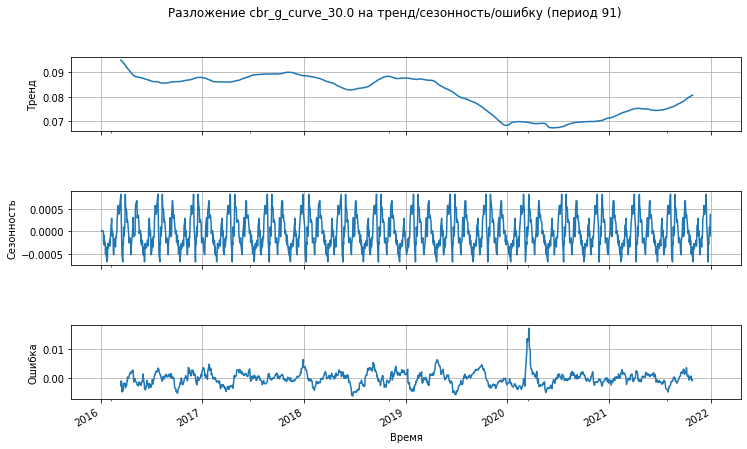

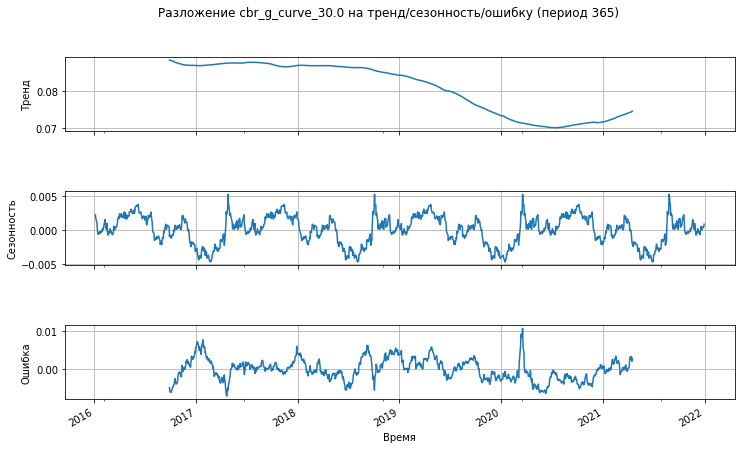

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


PHOR
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9898)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 1.0000)


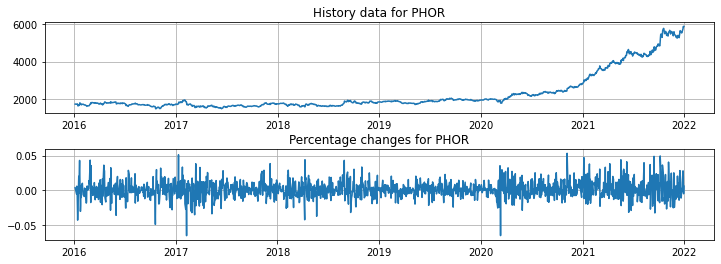

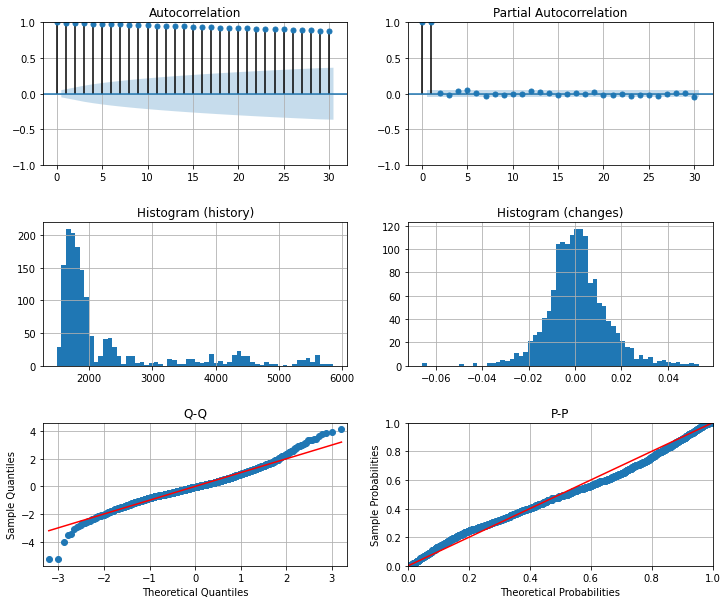

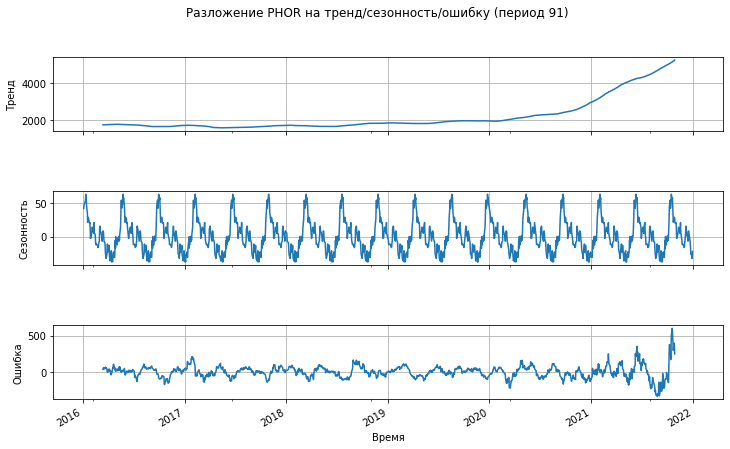

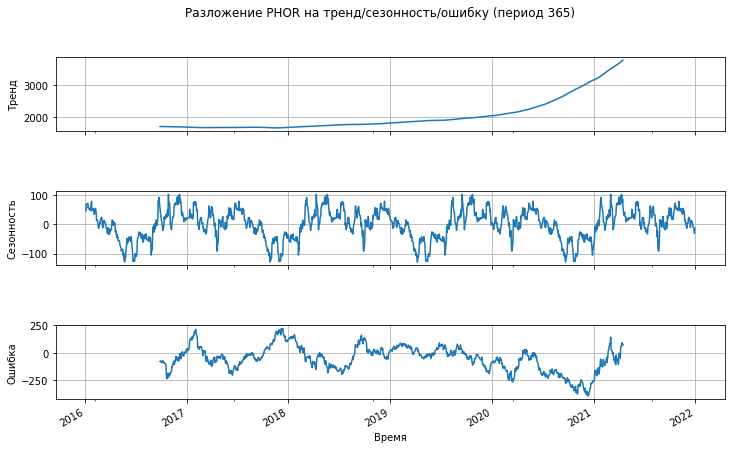

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


YNDX
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8218)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5548)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7885)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9064)


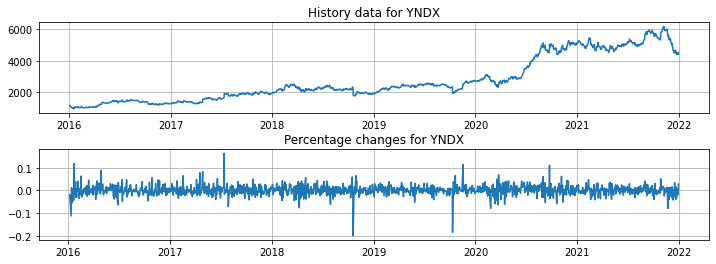

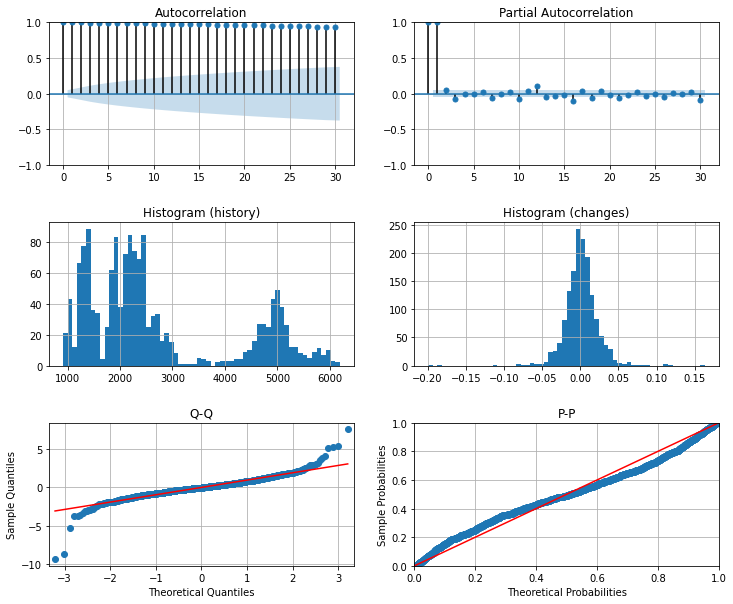

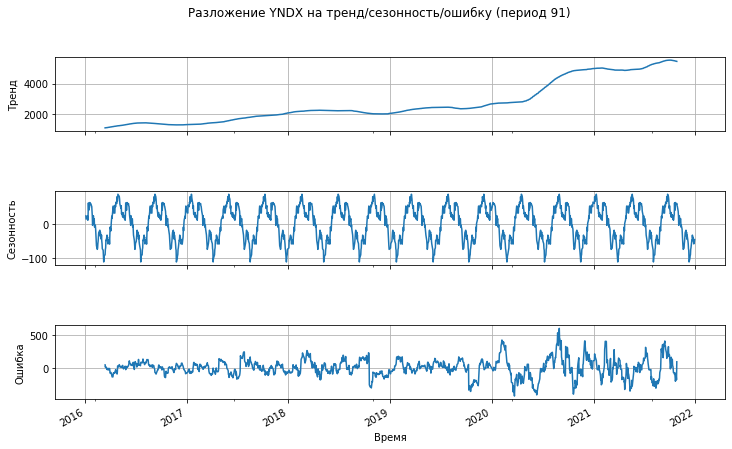

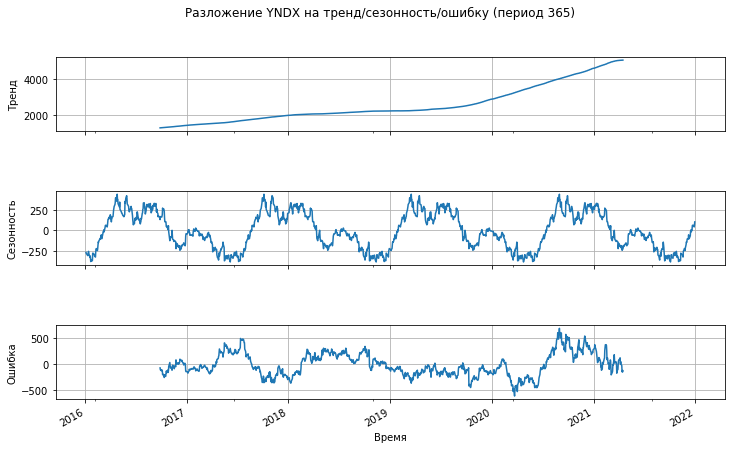

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


CHF
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.6572)
Тест с константой и линейным трендом: H0 отвергается, ряд стационарен (p-value 0.0679)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4077)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.6763)


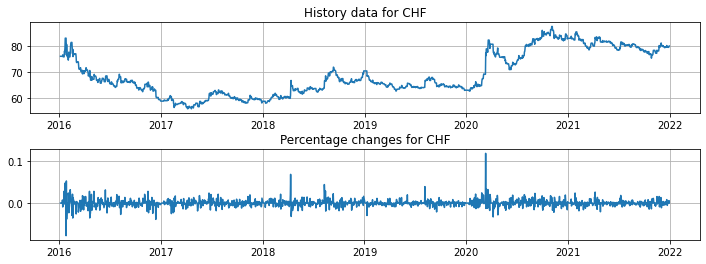

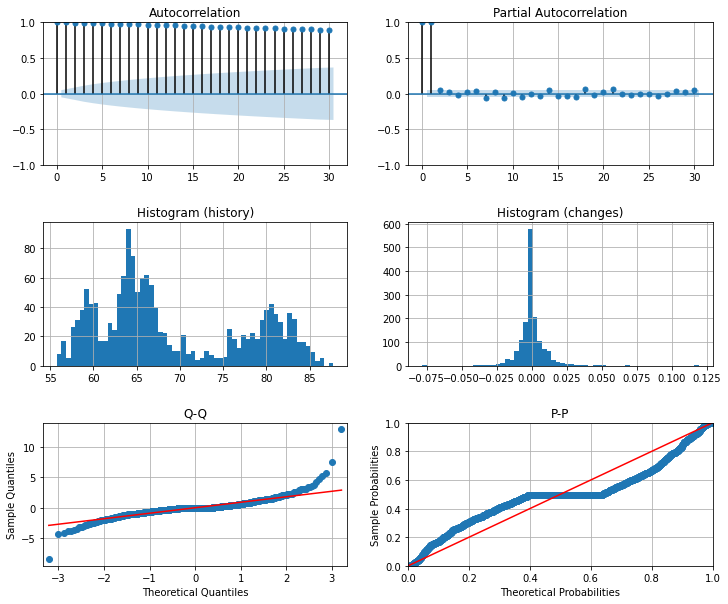

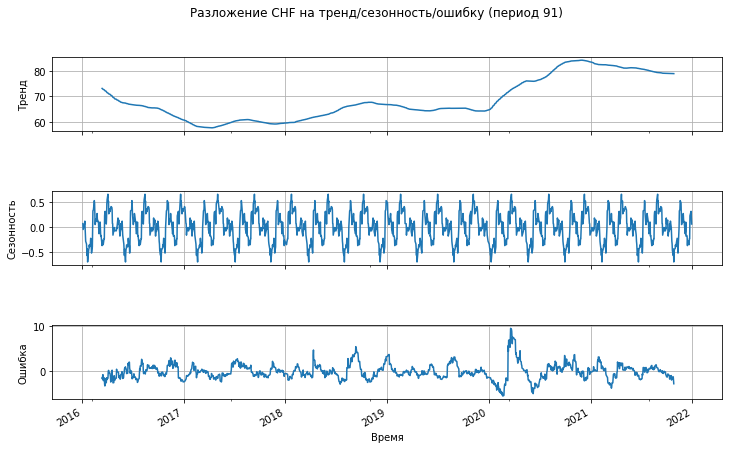

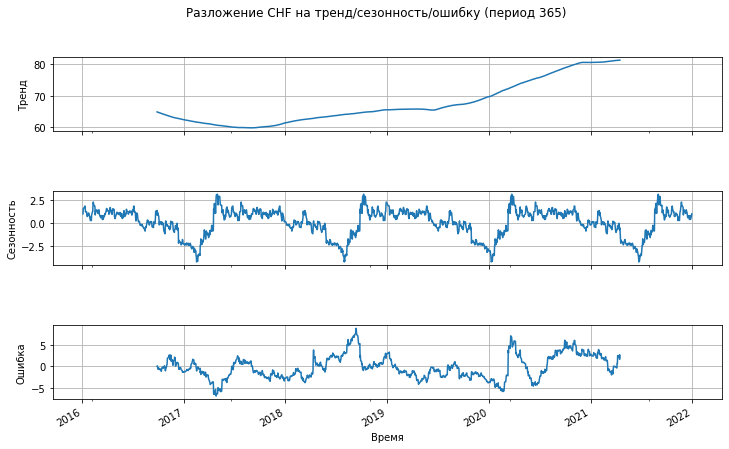

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


NKNCP
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9749)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5306)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1590)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9776)


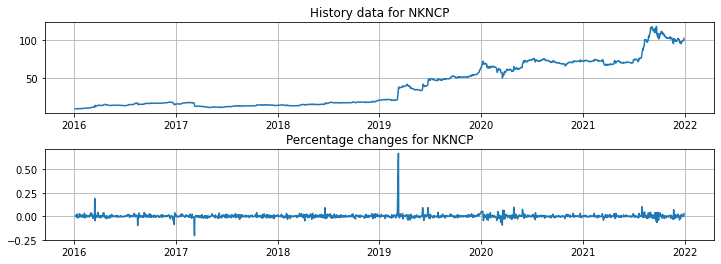

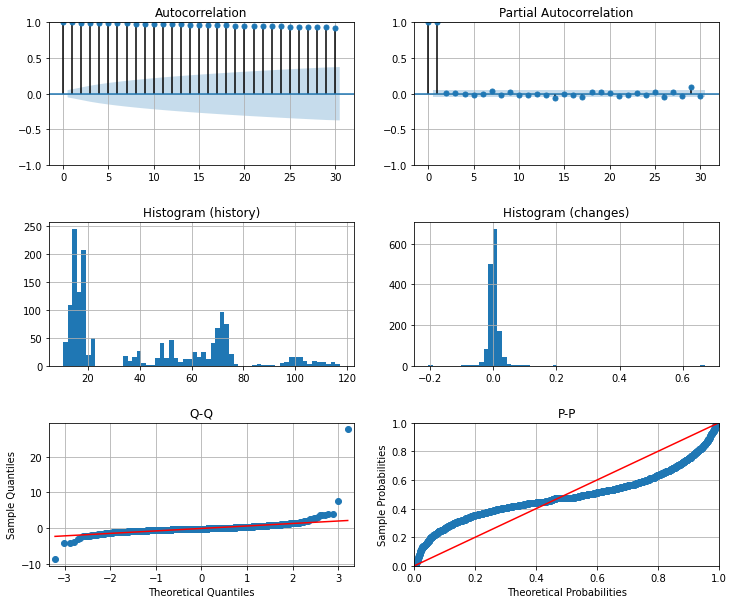

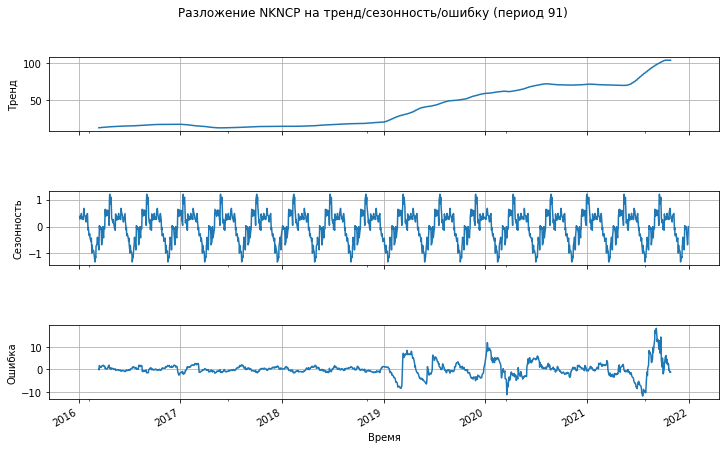

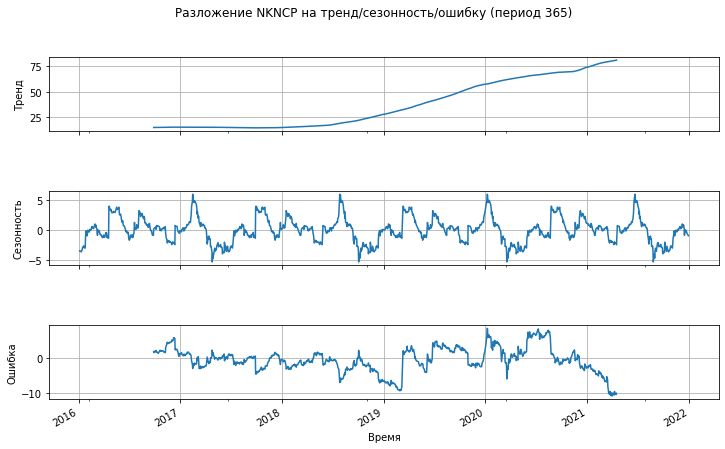

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


BELU
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9848)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9374)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4952)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9669)


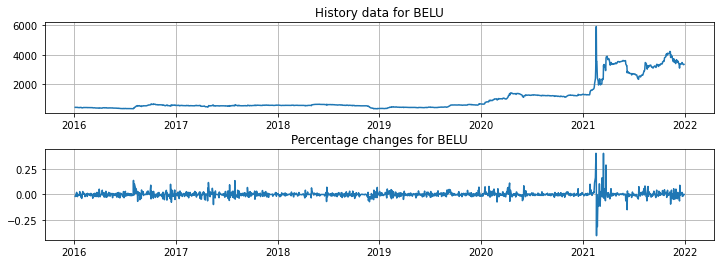

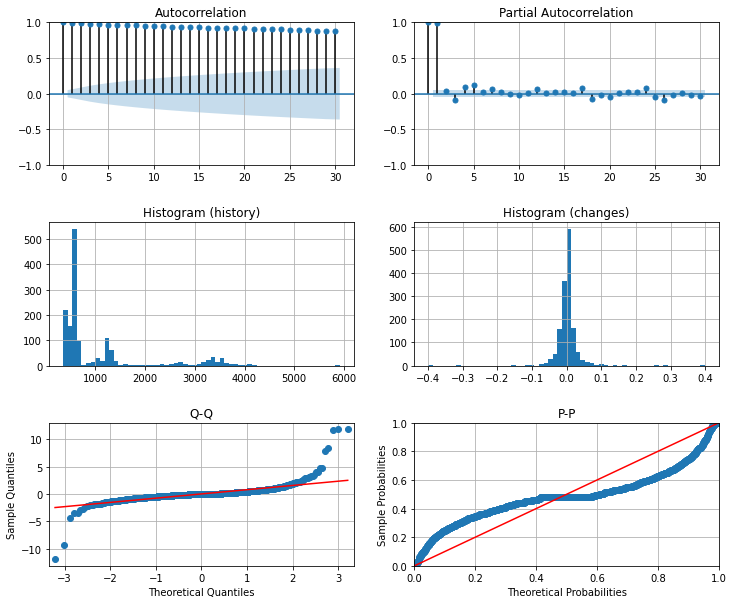

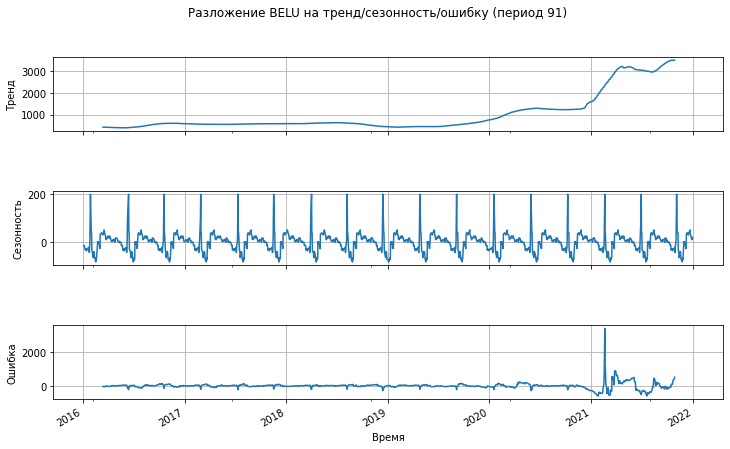

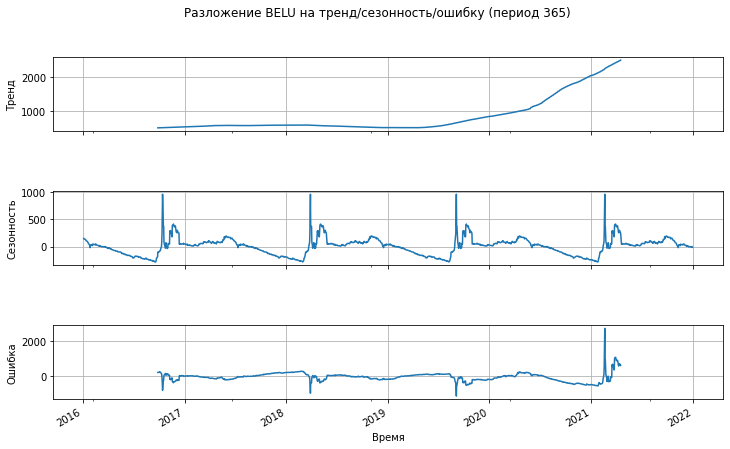

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


IMOEX
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8670)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2746)
Тест с константой, линейным и квадратичным трендом: H0 отвергается, ряд стационарен (p-value 0.0547)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9678)


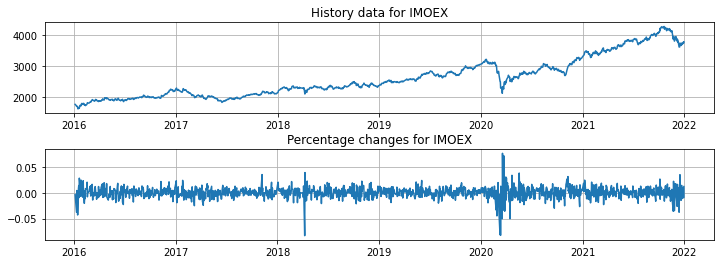

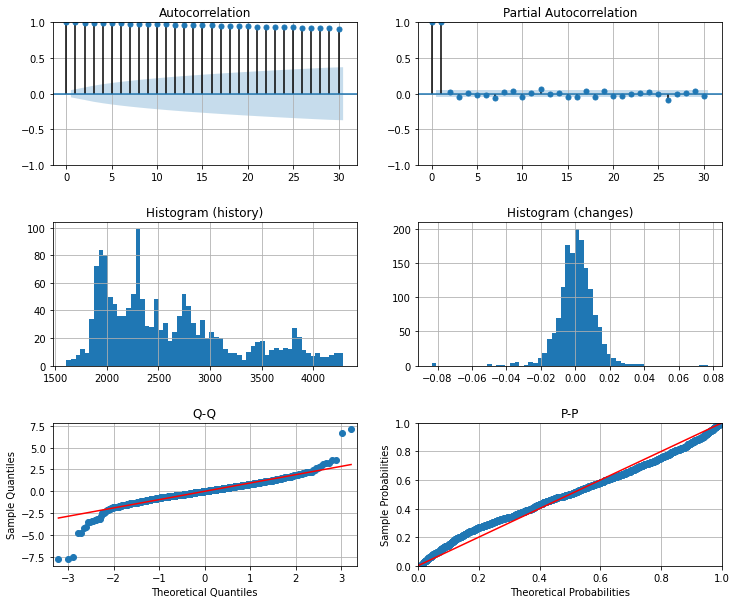

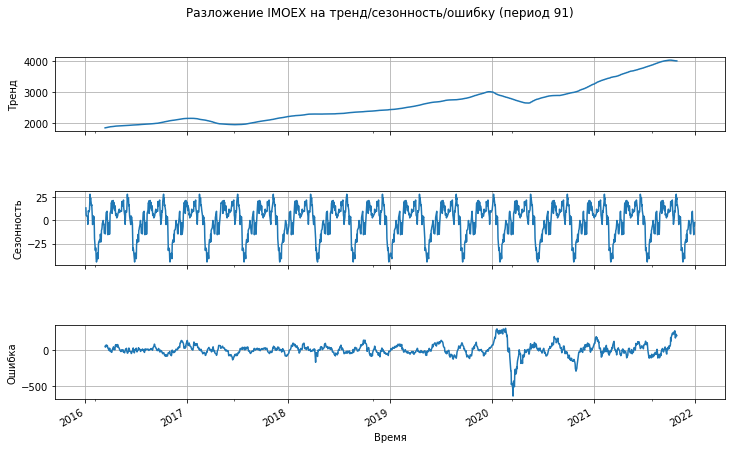

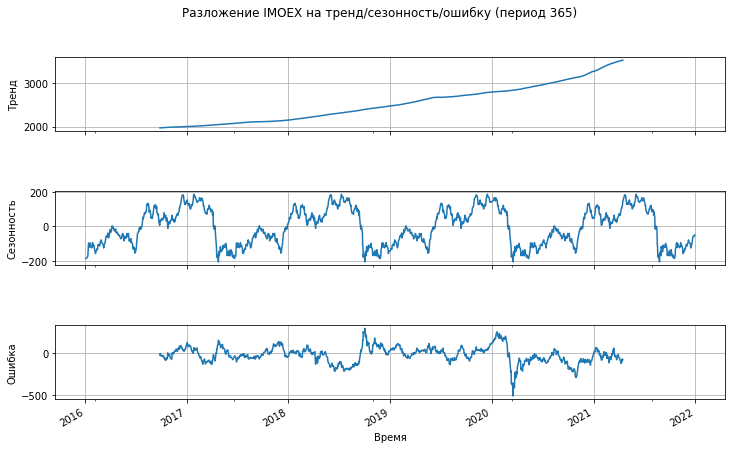

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


PIKK
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9860)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9363)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5324)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9824)


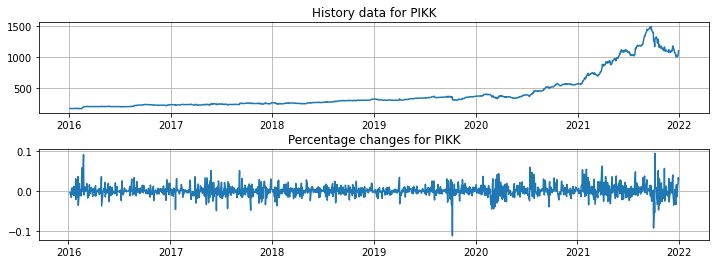

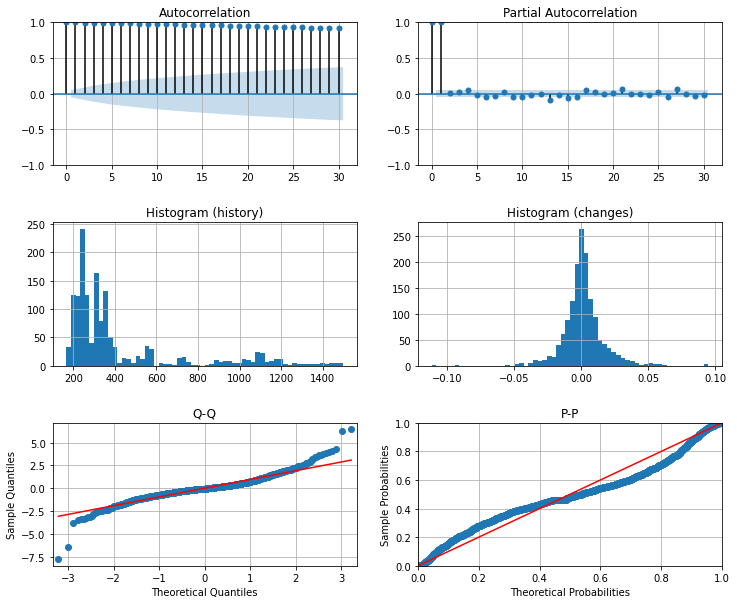

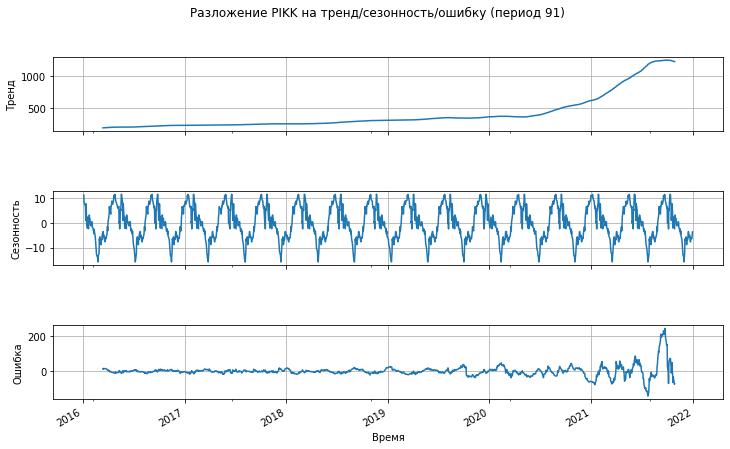

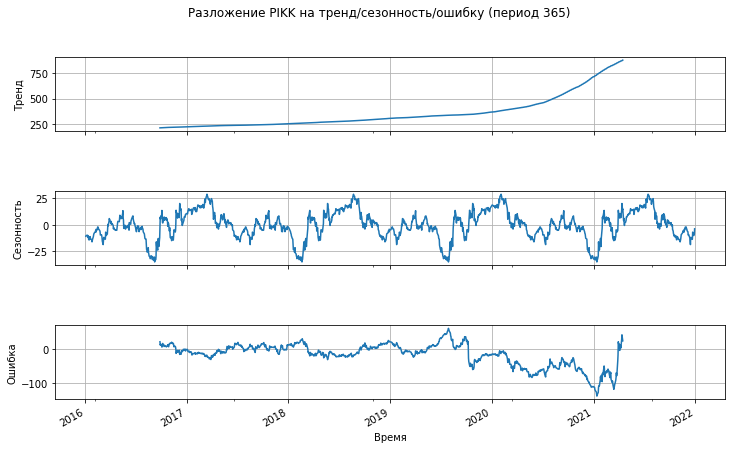

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


SELG
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9929)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9552)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4285)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9912)


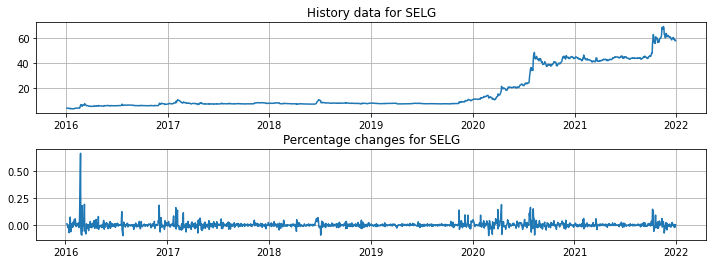

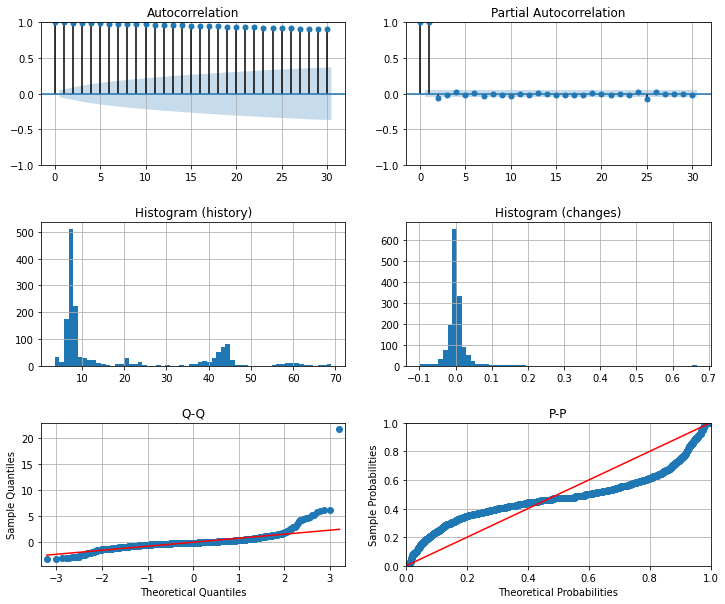

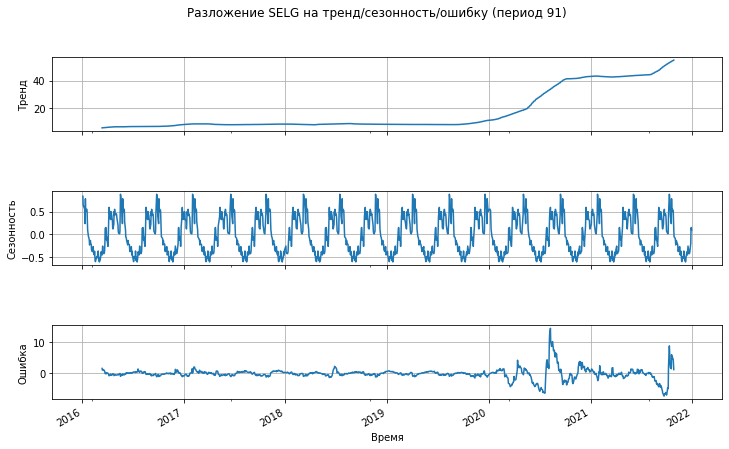

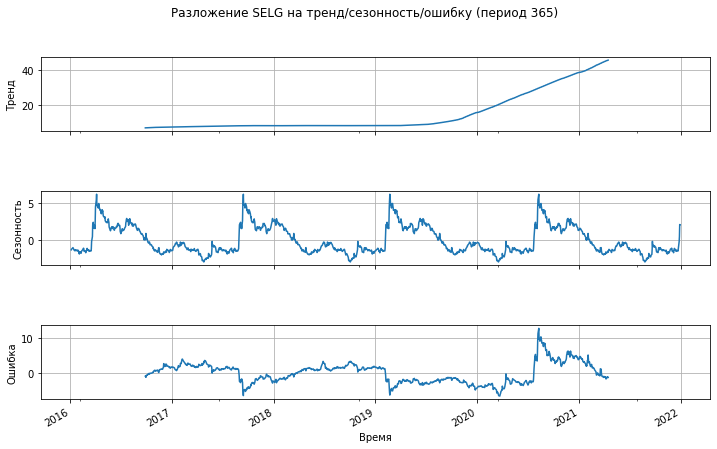

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


BRENT
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3531)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.6265)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8999)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8106)


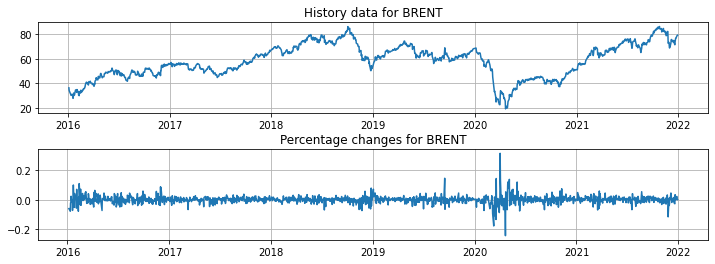

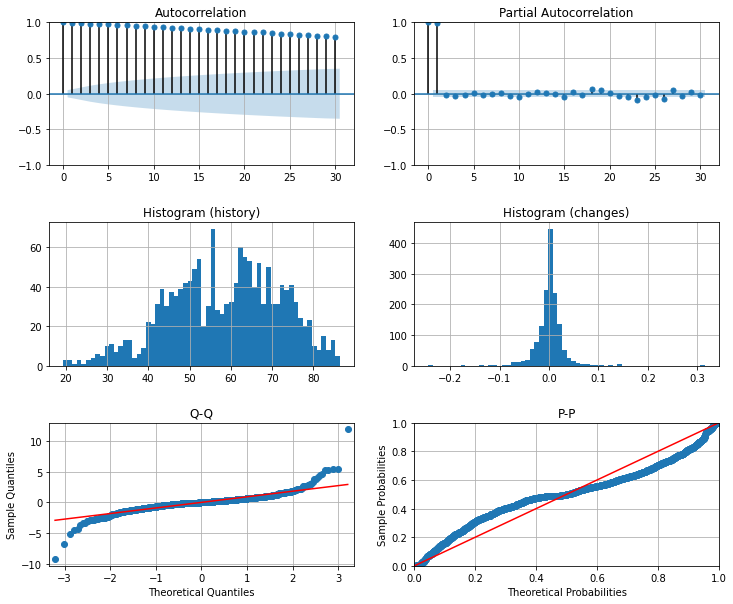

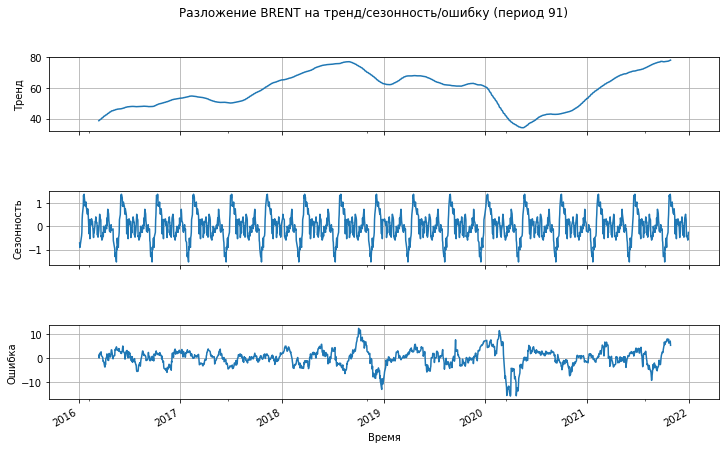

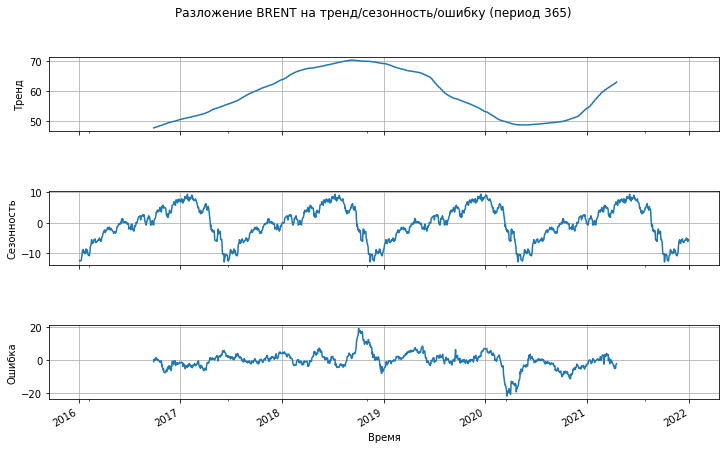

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


MVID
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.4989)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7759)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.9631)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.7824)


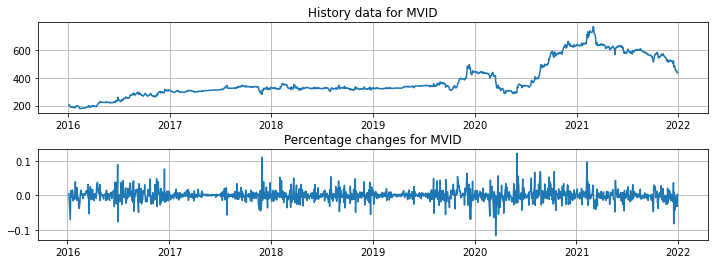

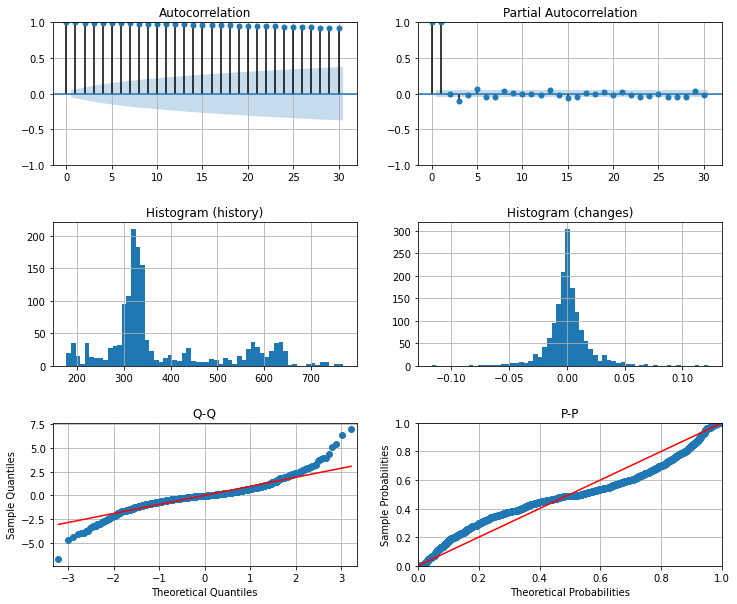

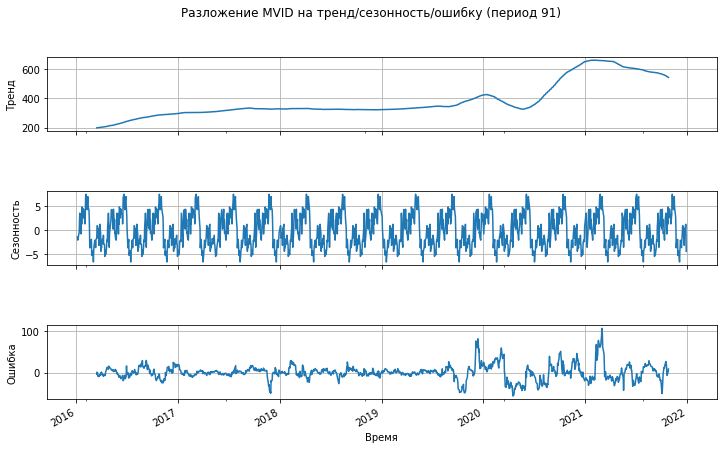

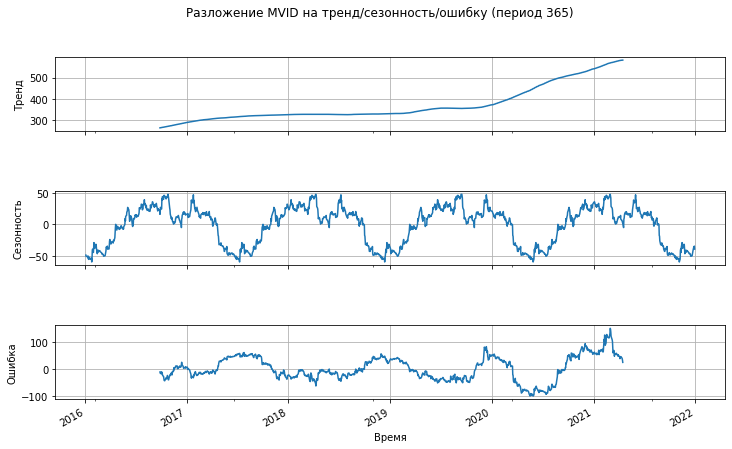

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


RTSI
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.3776)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.1435)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2706)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8796)


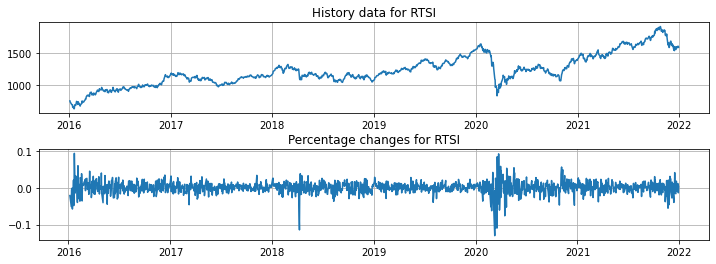

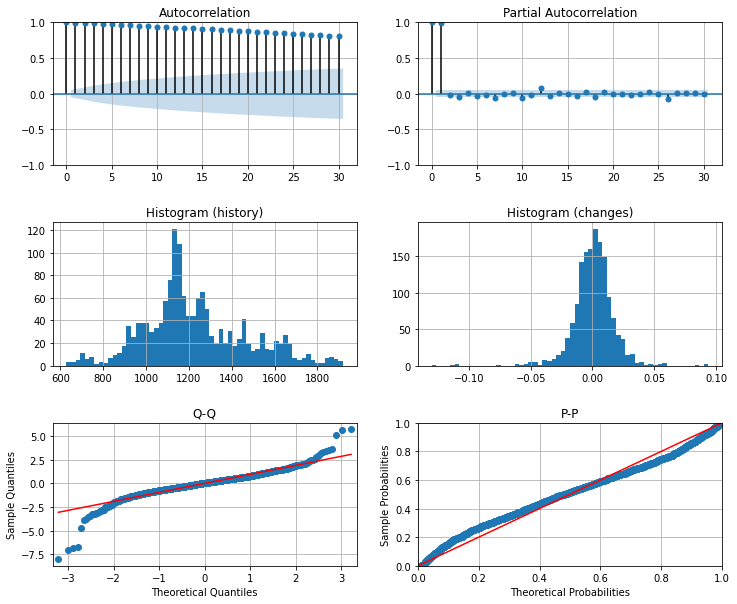

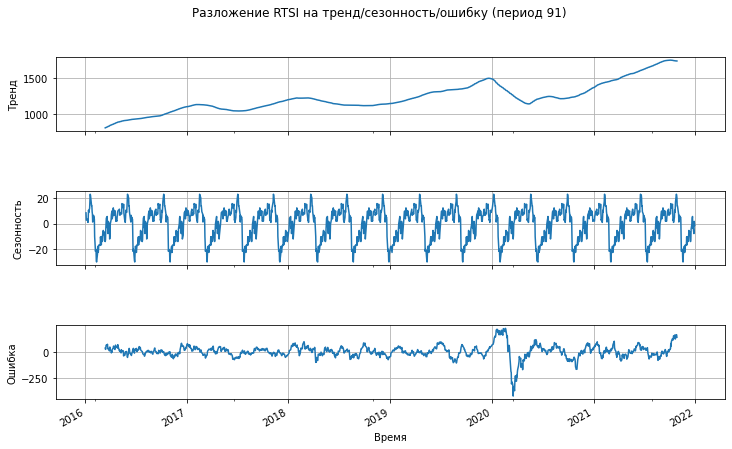

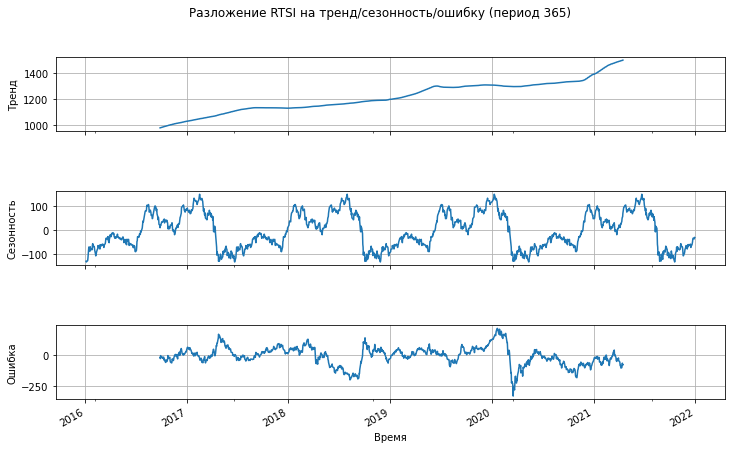

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


GOLD
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8977)
Тест с константой и линейным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5002)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8948)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.8897)


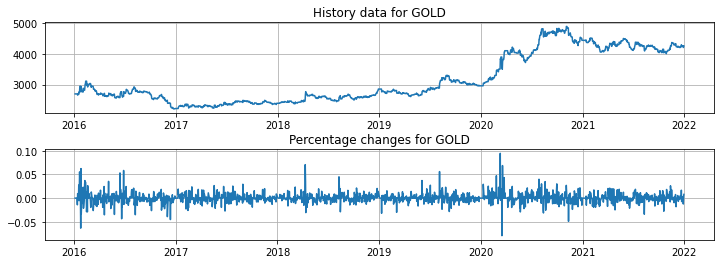

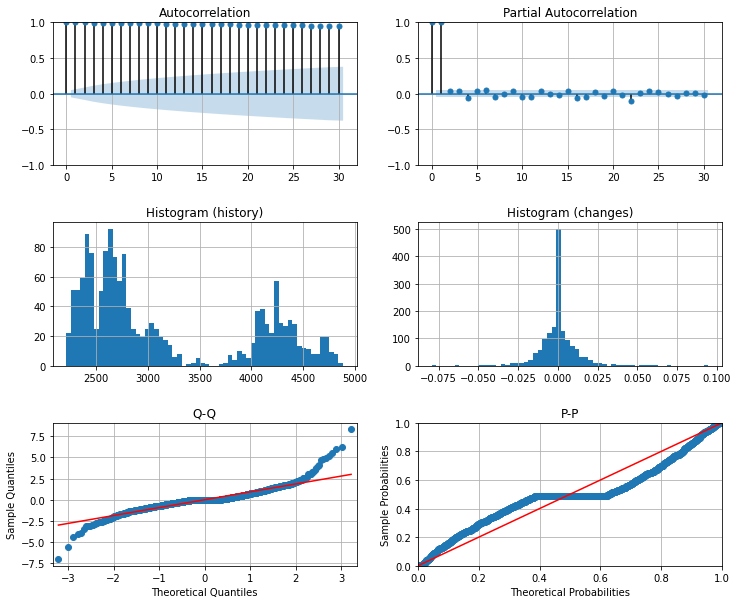

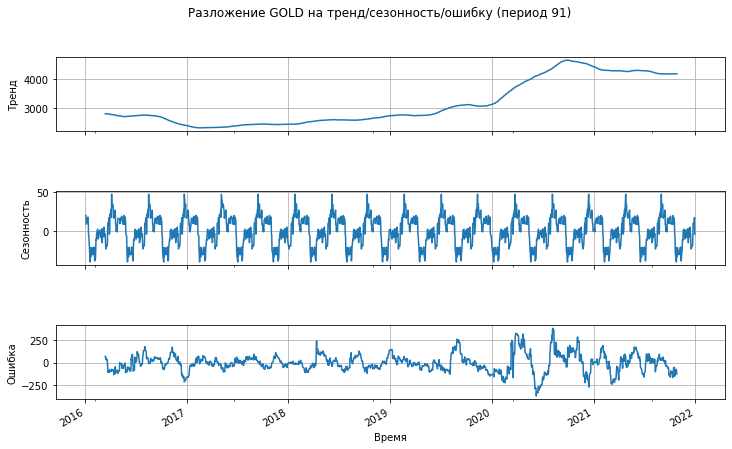

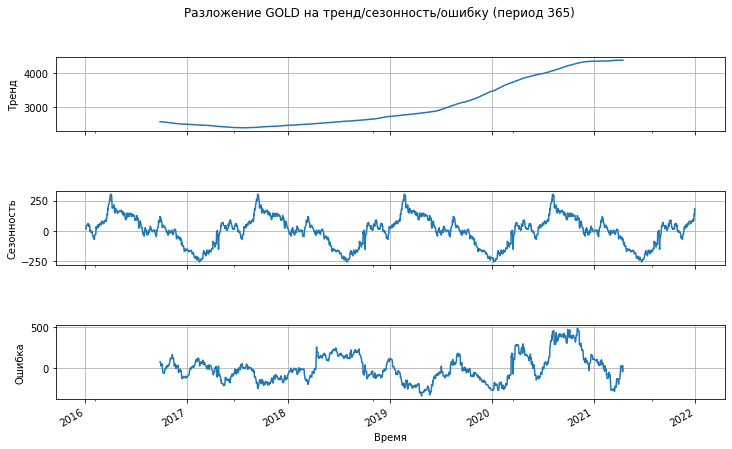

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


USD
Расширенный тест Дики — Фуллера (ADF):
Тест с константой: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2952)
Тест с константой и линейным трендом: H0 отвергается, ряд стационарен (p-value 0.0548)
Тест с константой, линейным и квадратичным трендом: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.2503)
Тест без константы и тренда: нельзя отвергнуть H0, ряд может содержать единичные корни и быть нестационарным (p-value 0.5816)


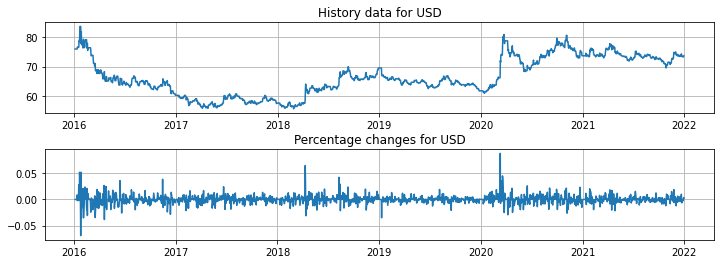

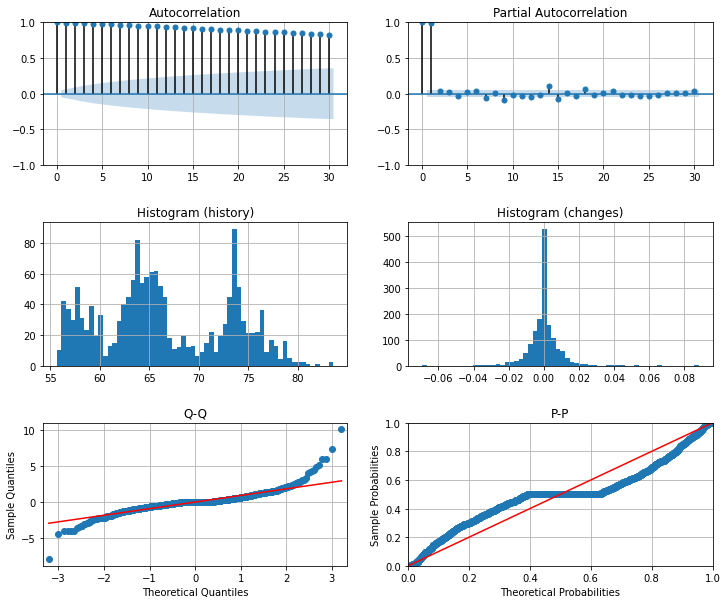

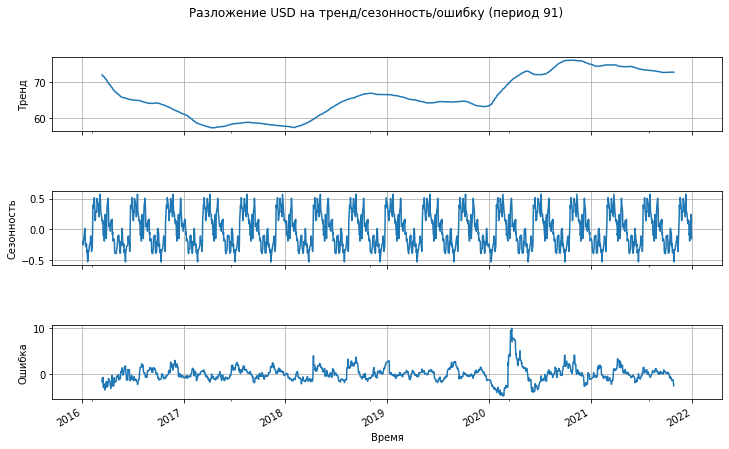

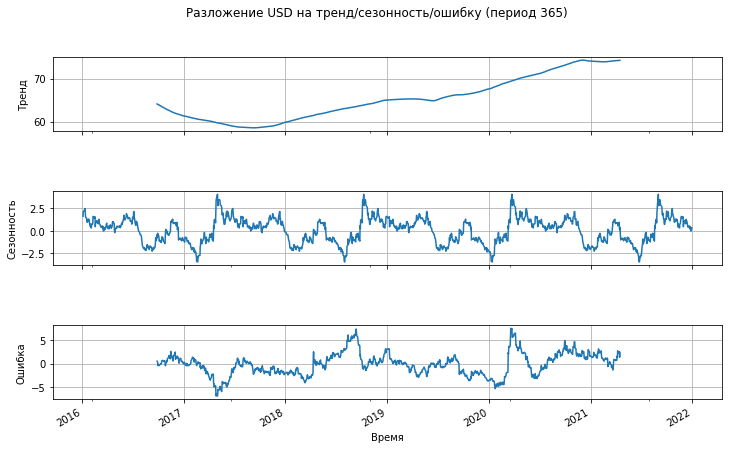

In [11]:
for ticker in df_all.columns:
    get_description(ticker)

# CORR

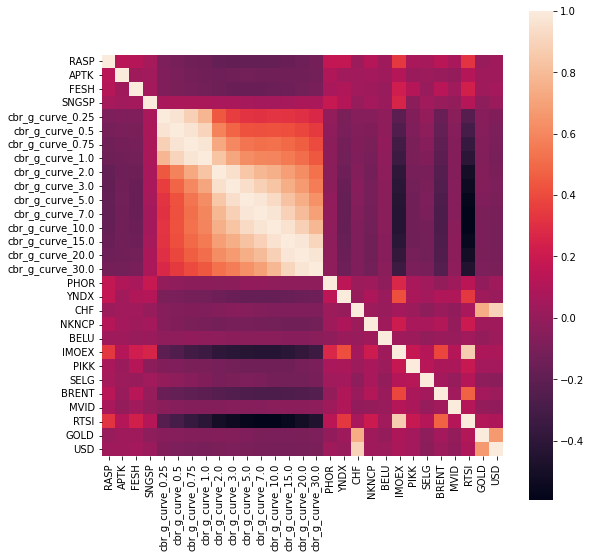

In [12]:
# M = df_change[["USD", "CHF", "GOLD","BRENT",  "IMOEX", "RTSI"]].corr()
M = df_change.corr()
fig = plt.figure(figsize=(9, 9))
newLabs = M.index
hmap = sns.heatmap(
                M,
                square=True,
                # cbar=False,
    )


<Figure size 504x504 with 0 Axes>

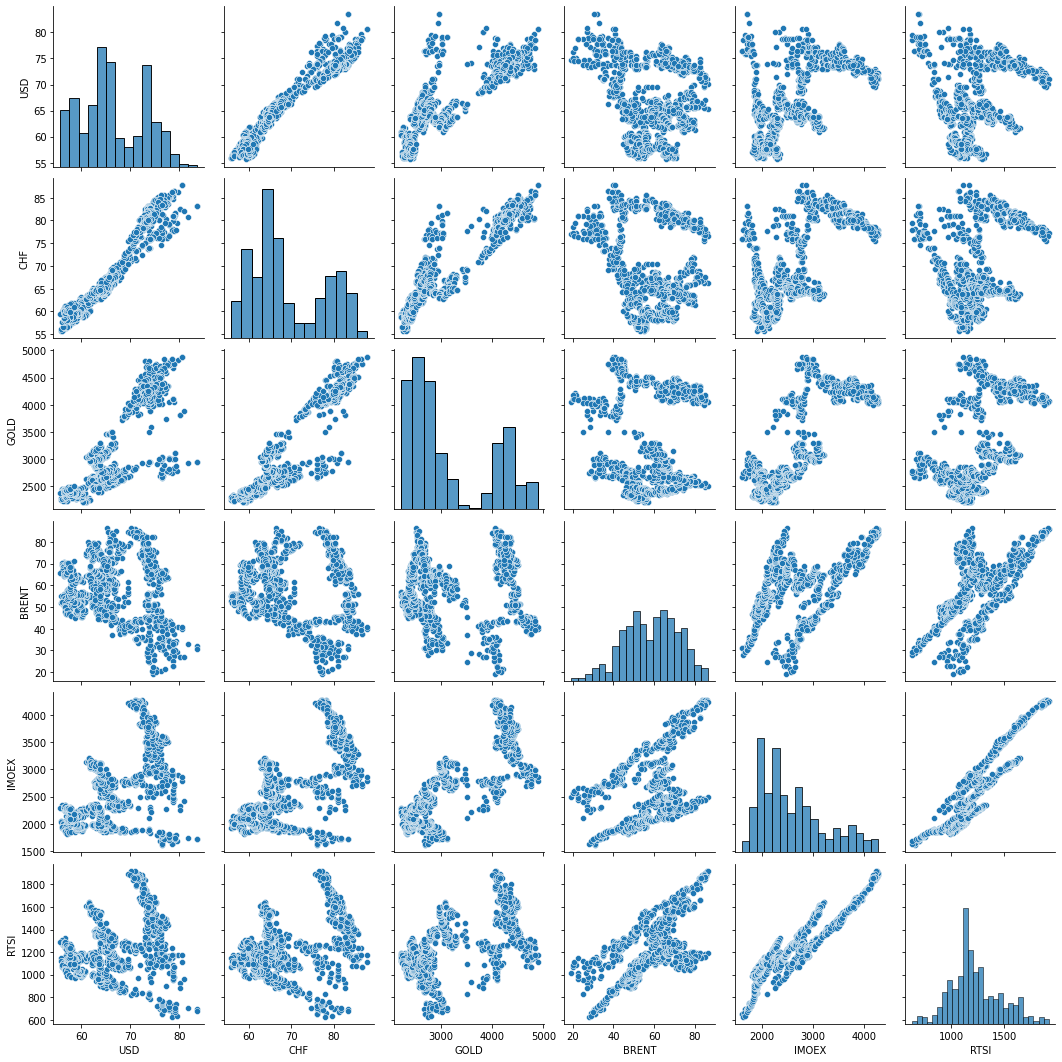

In [13]:
# selected_companies = ['OFZ_26207', 'OFZ_26209', 'OFZ_26211', 'OFZ_26212', 'OFZ_26218',]

selected_companies = ["USD", "CHF", "GOLD","BRENT",  "IMOEX", "RTSI"]

fig = plt.figure(figsize=(7, 7))
sns.pairplot(df_all[selected_companies])
plt.show()